In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
df = pd.read_csv("./weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#EDA

#Display information
print("Data Information : ")
df.info()

Data Information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am 

In [4]:
#Display descriptive statistics
print("\nDescriptive Statistics : ")
print(df.describe())


Descriptive Statistics : 
             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000 

In [5]:
#Check for missing values
print("\nMissing Values in each column: ")
print(df.isnull().sum())


Missing Values in each column: 
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [6]:
#Check for duplicates
print("\nNumber of duplicated rows : ")
print(df.duplicated().sum())


Number of duplicated rows : 
0


In [7]:
print("\nDataset shape:", df.shape)


Dataset shape: (145460, 23)


In [8]:
#Display value counts
print("\nClass distribution BEFORE preprocessing:")
print(df['RainTomorrow'].value_counts())
print("\nPercentage distribution:")
print(df['RainTomorrow'].value_counts(normalize=True) * 100)


Class distribution BEFORE preprocessing:
RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

Percentage distribution:
RainTomorrow
No     77.581878
Yes    22.418122
Name: proportion, dtype: float64


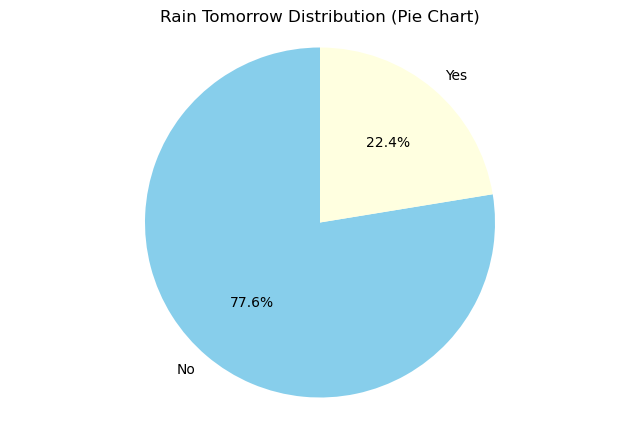

In [9]:
# Pie chart for RainTomorrow
plt.figure(figsize=(8, 5))
rain_counts = df['RainTomorrow'].value_counts()
plt.pie(rain_counts, labels=rain_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightyellow'])
plt.title('Rain Tomorrow Distribution (Pie Chart)')
plt.axis('equal')
plt.show()

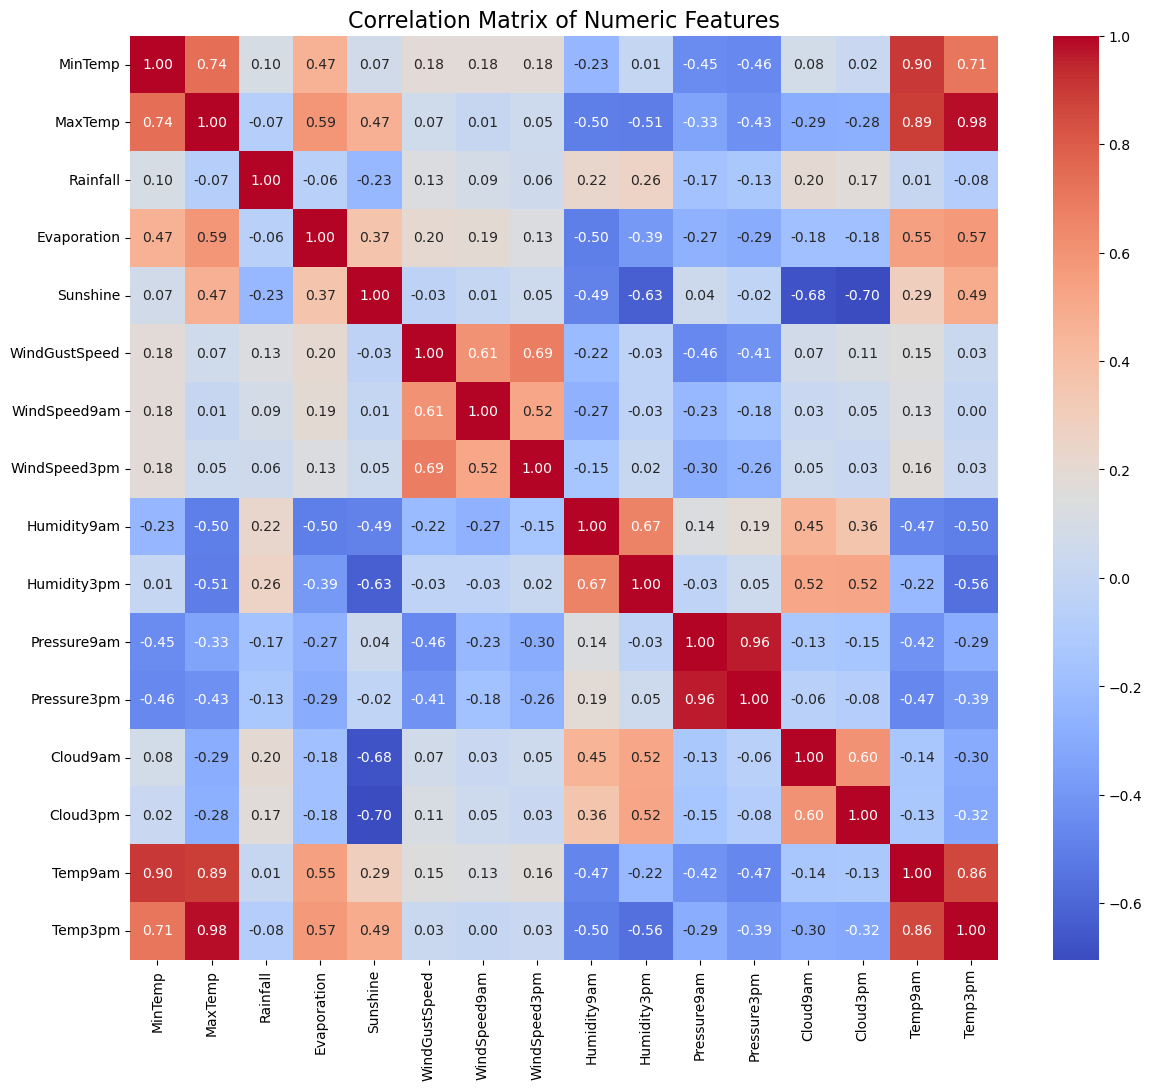

In [10]:
#Correlation heatmap for numeric features
plt.figure(figsize=(14, 12))
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()

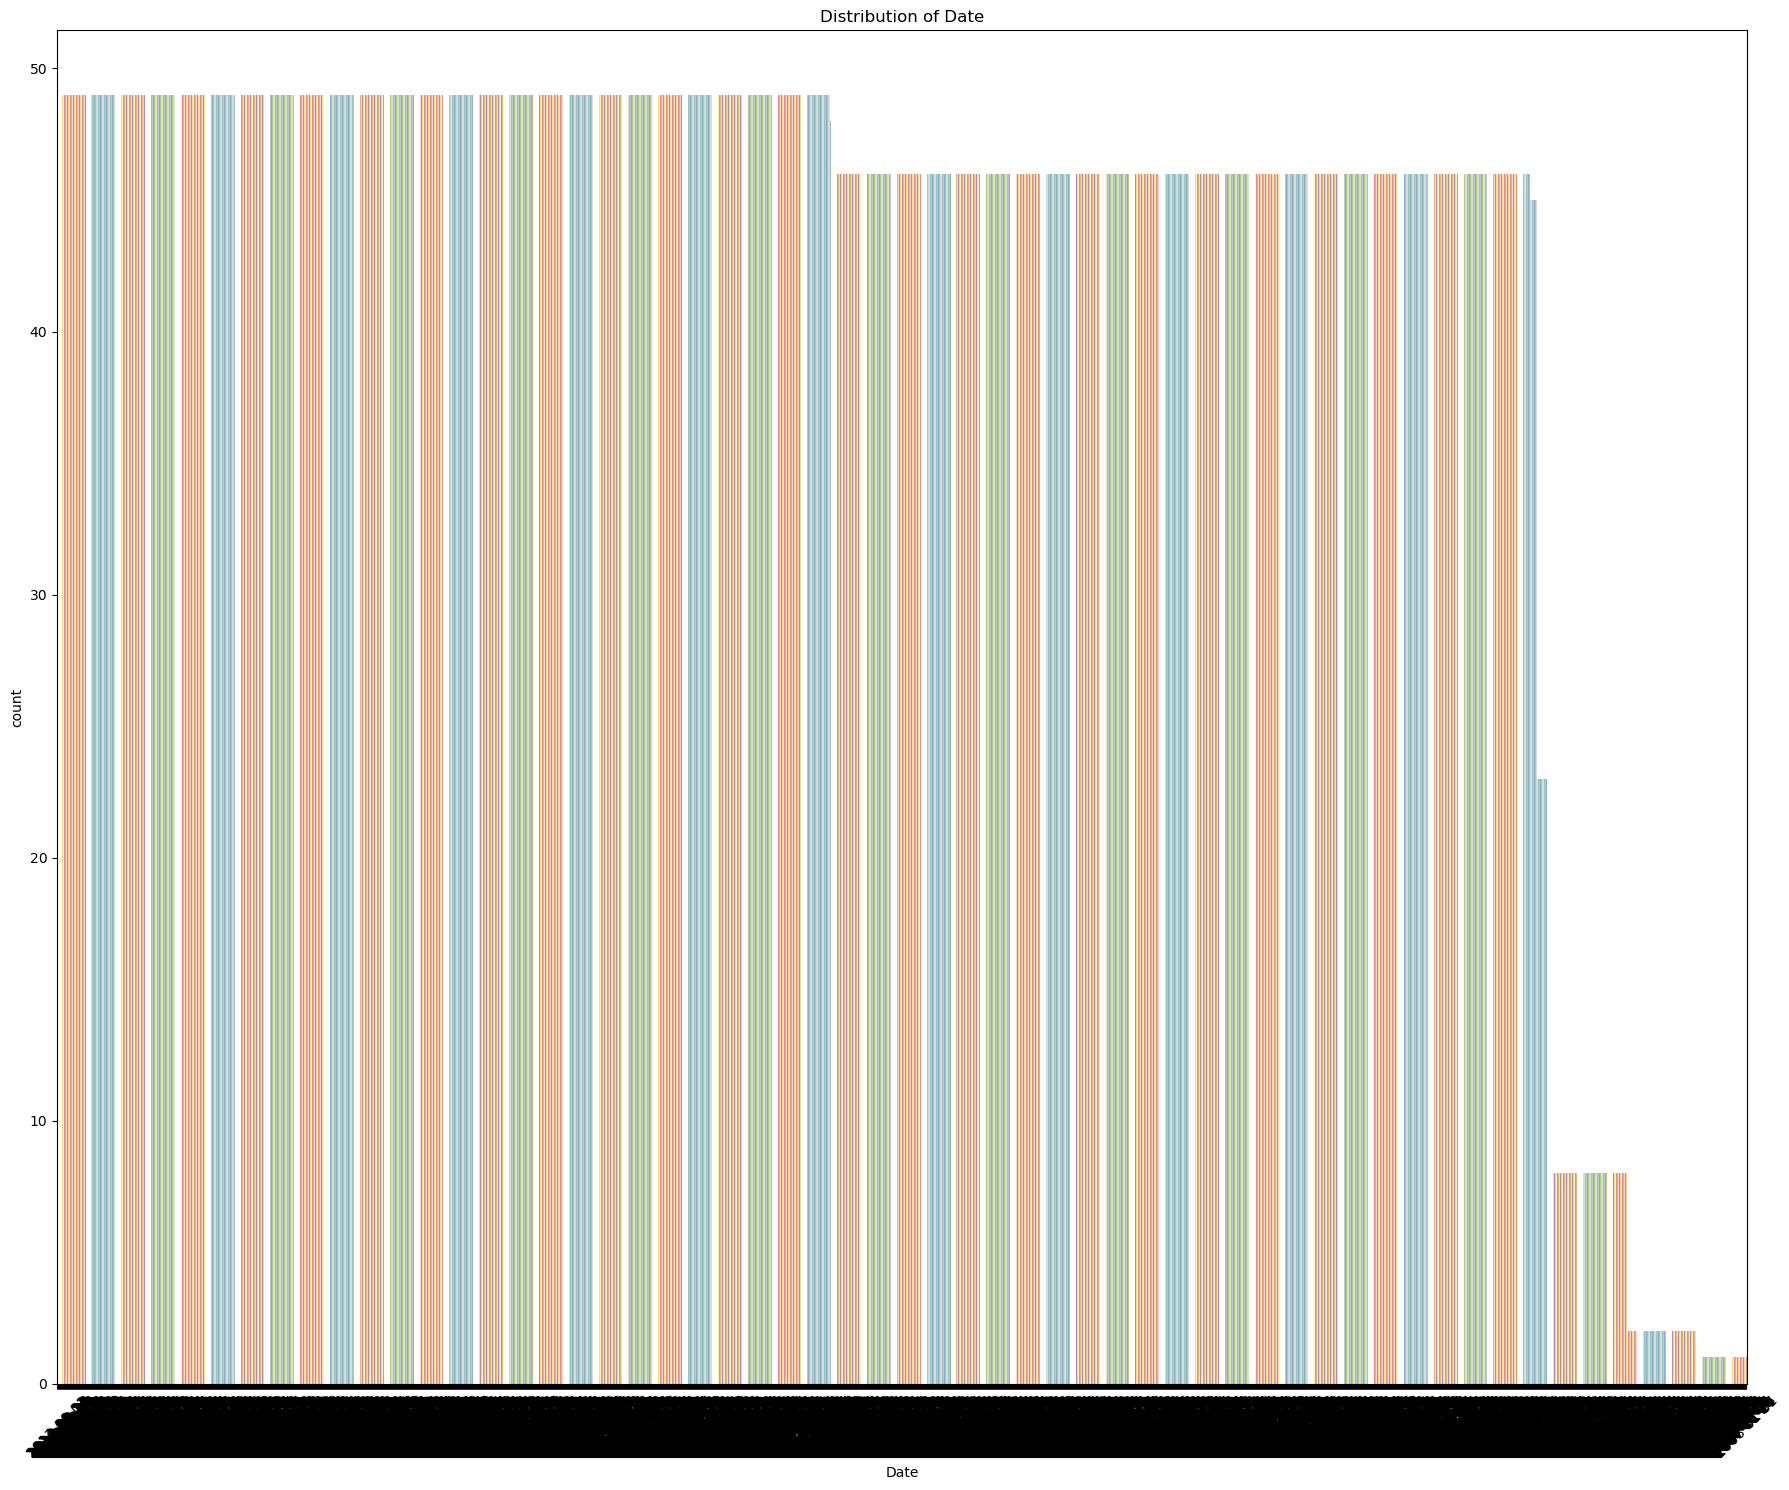

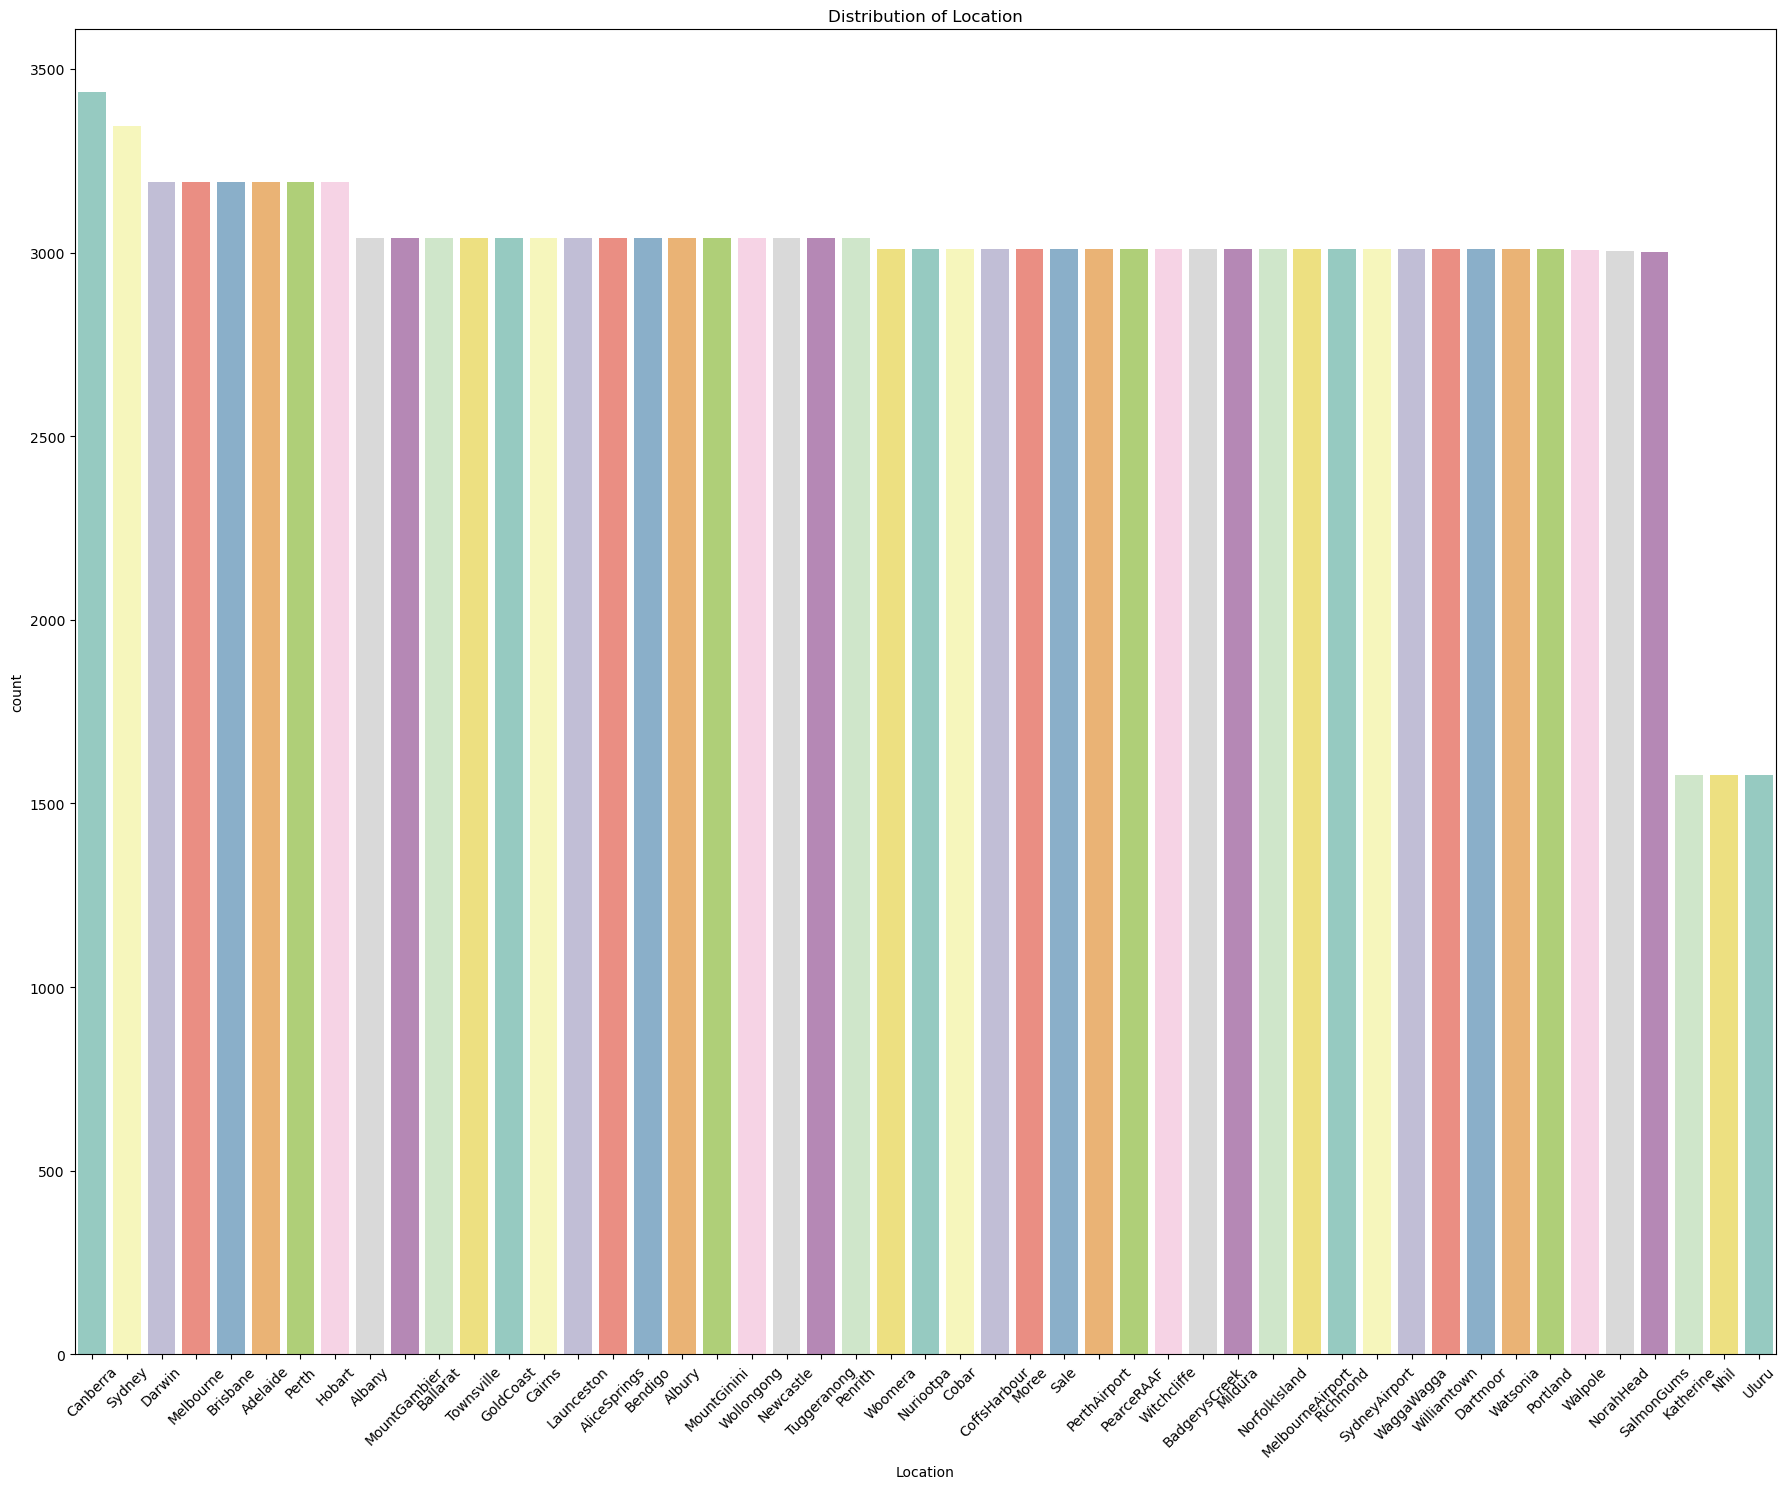

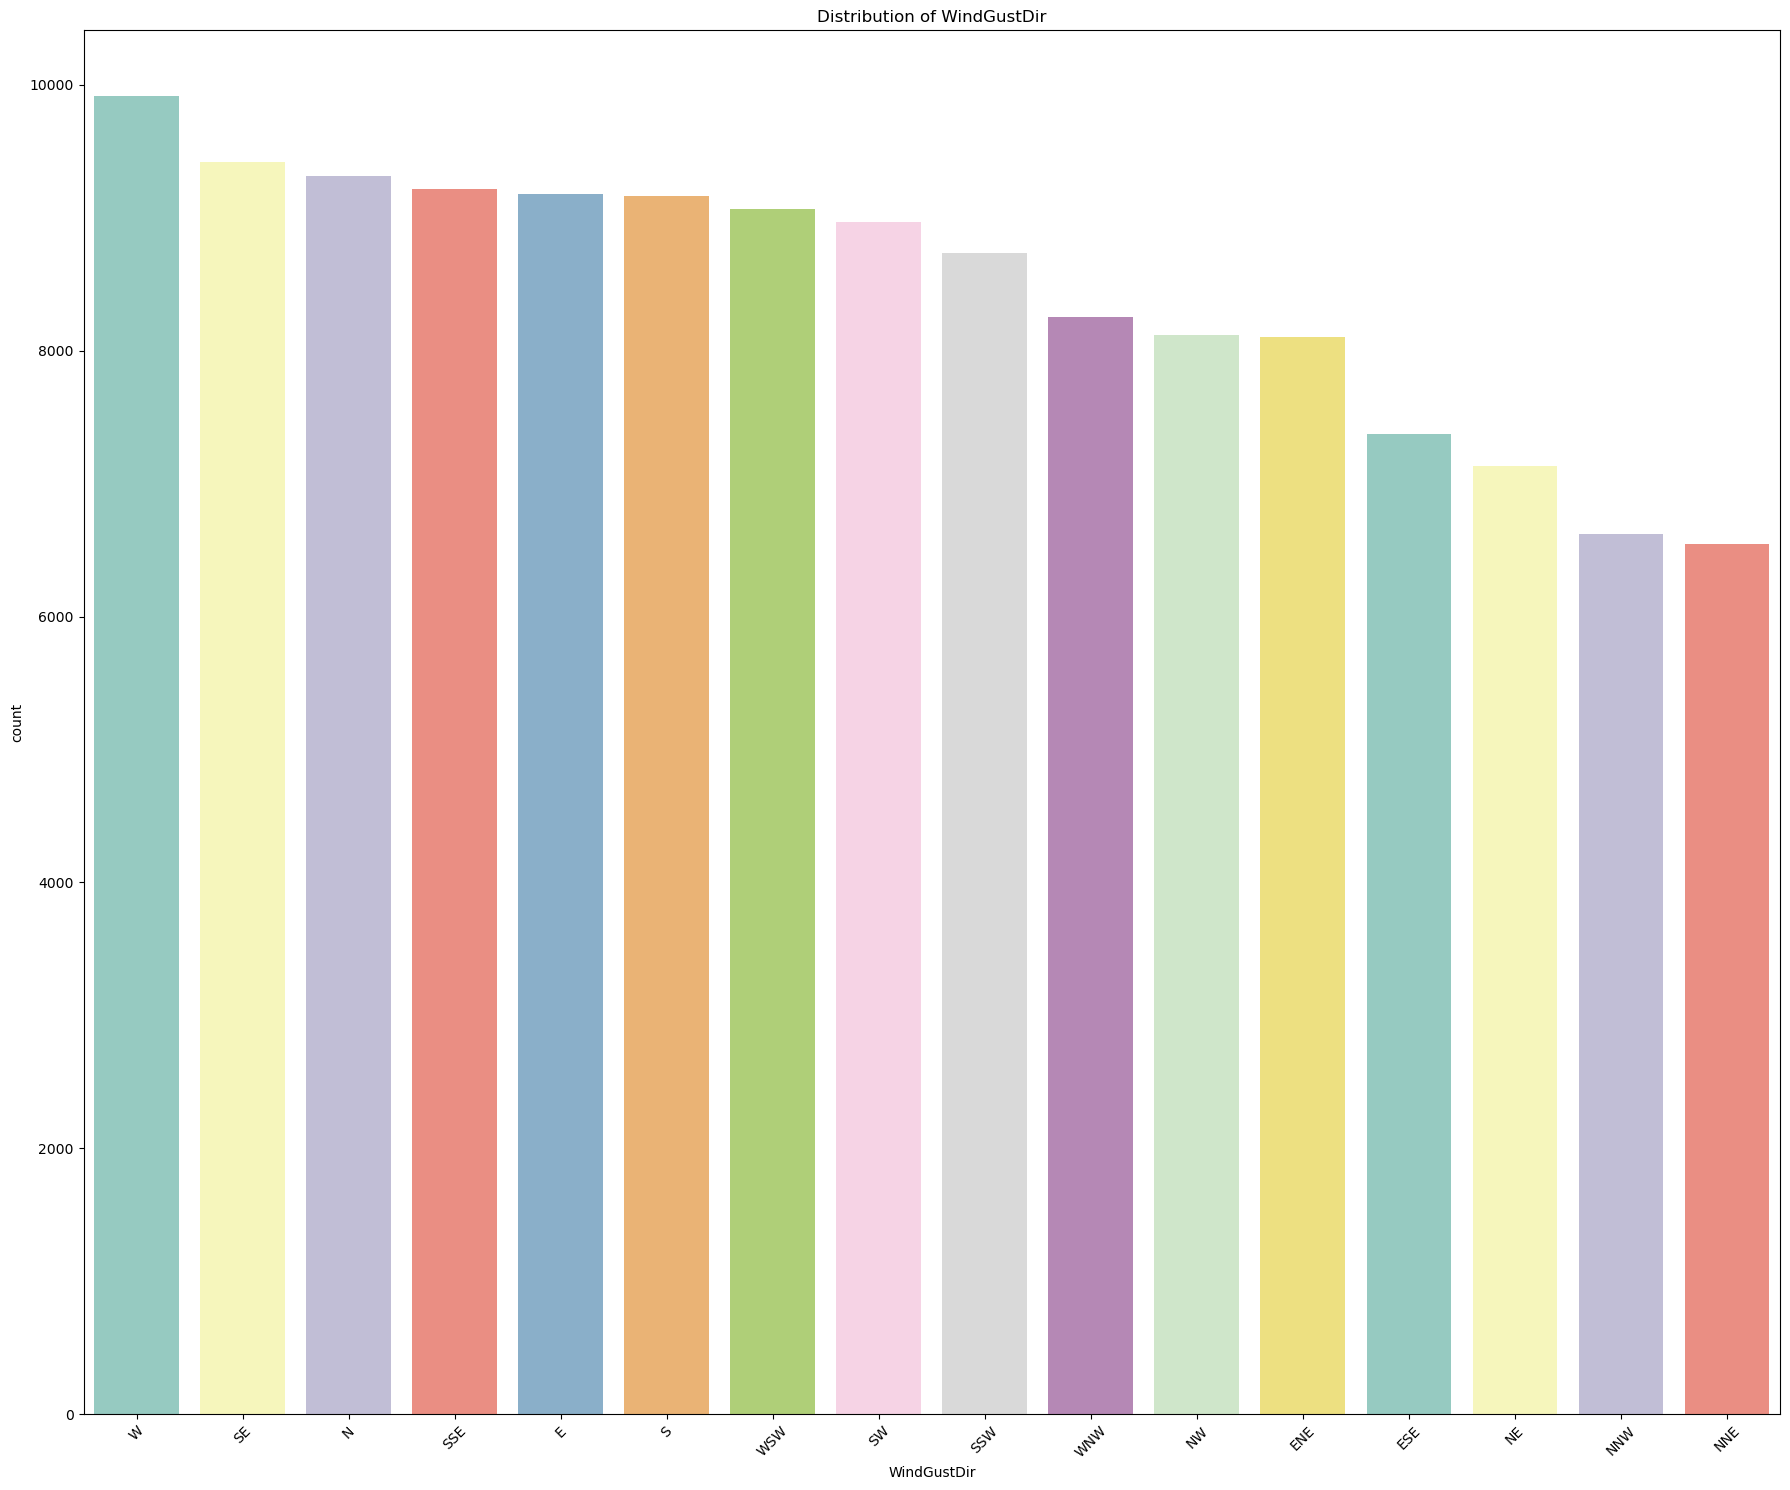

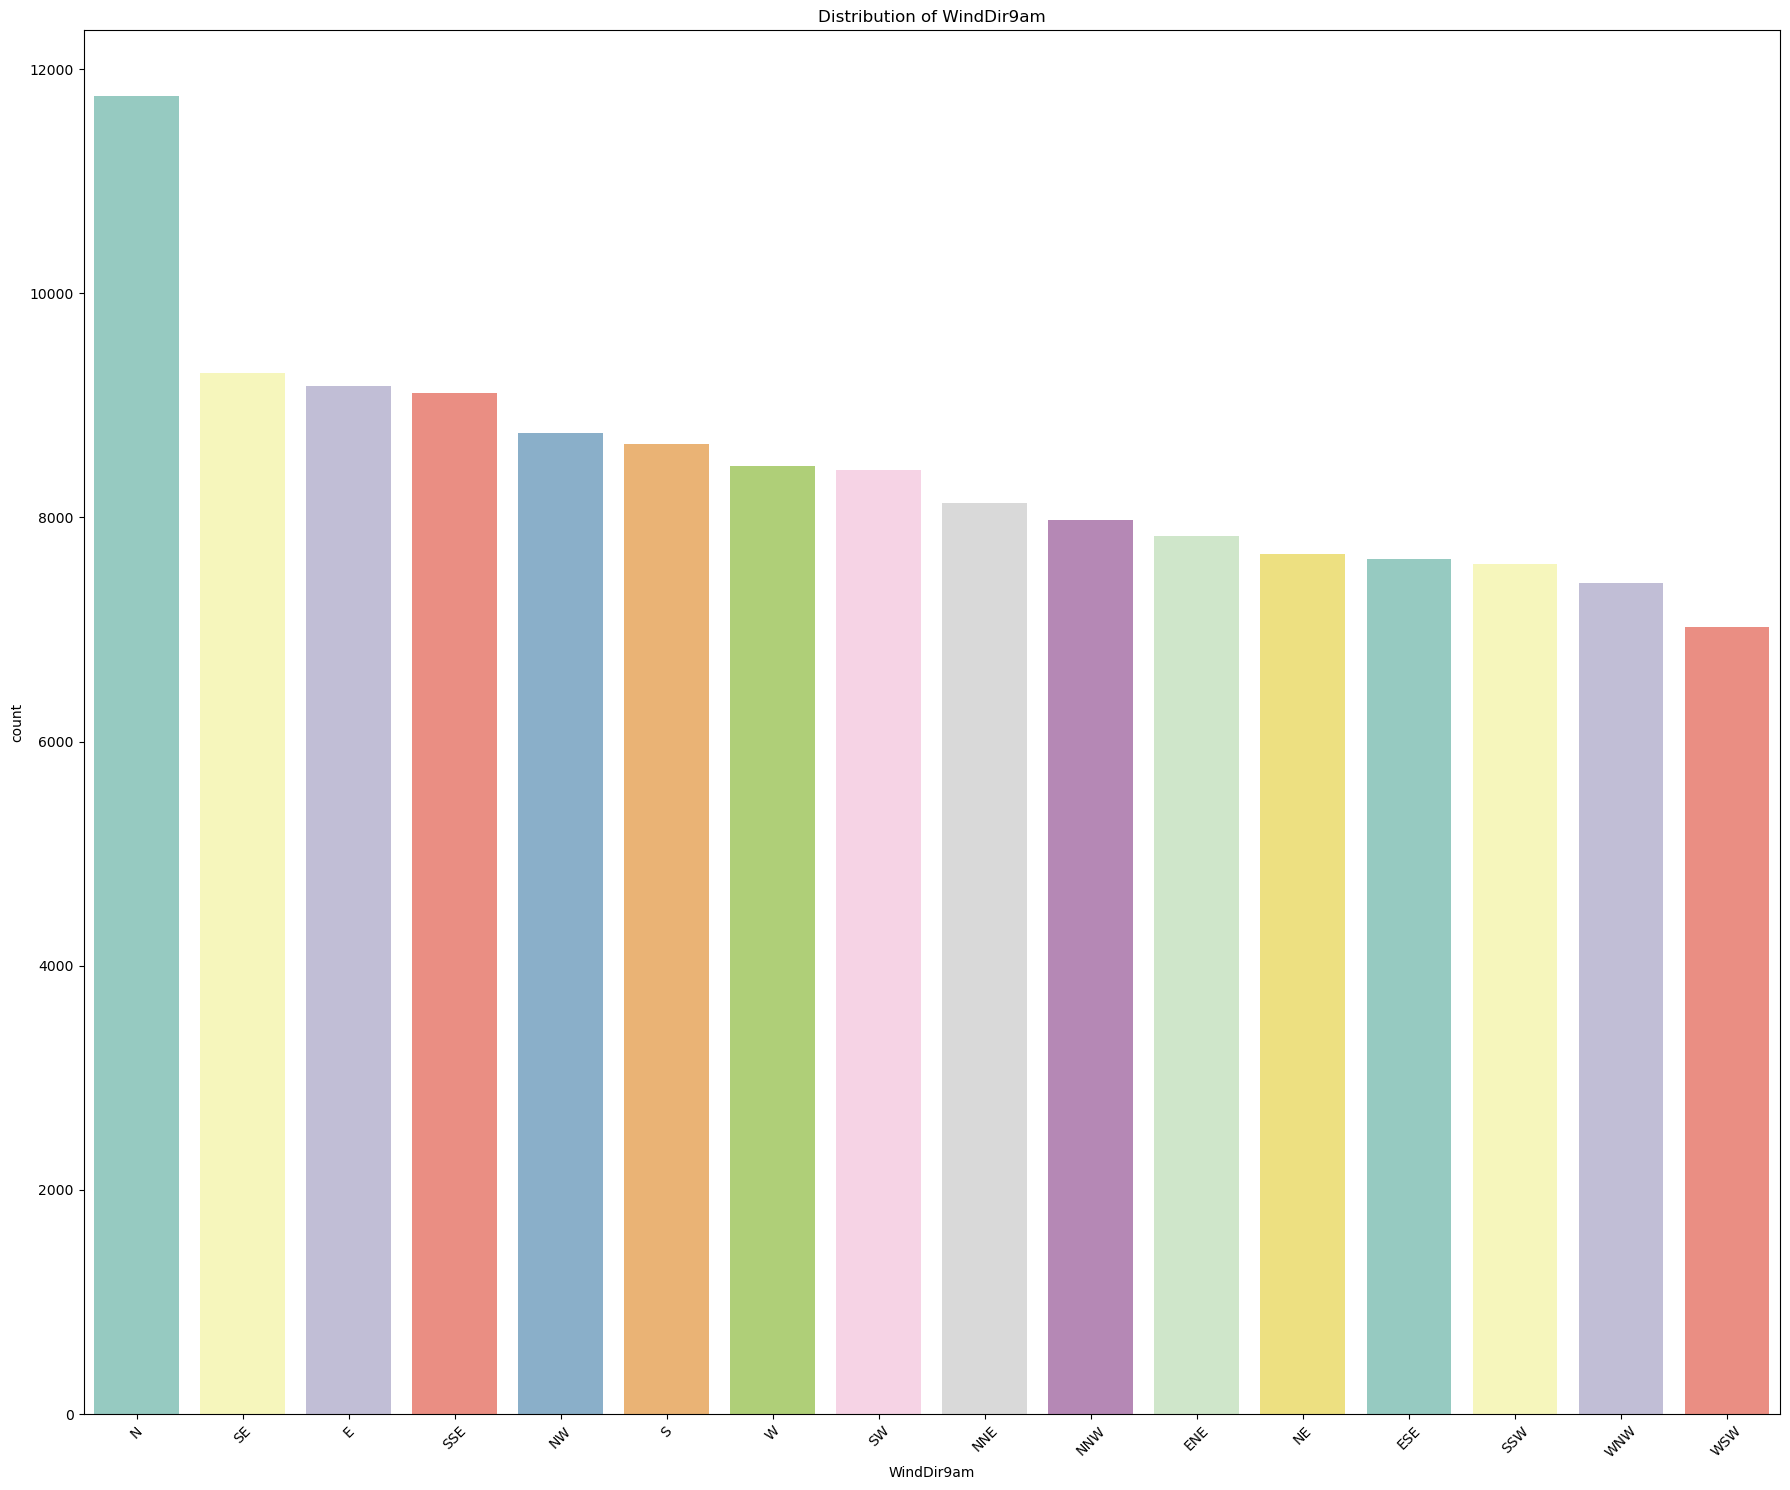

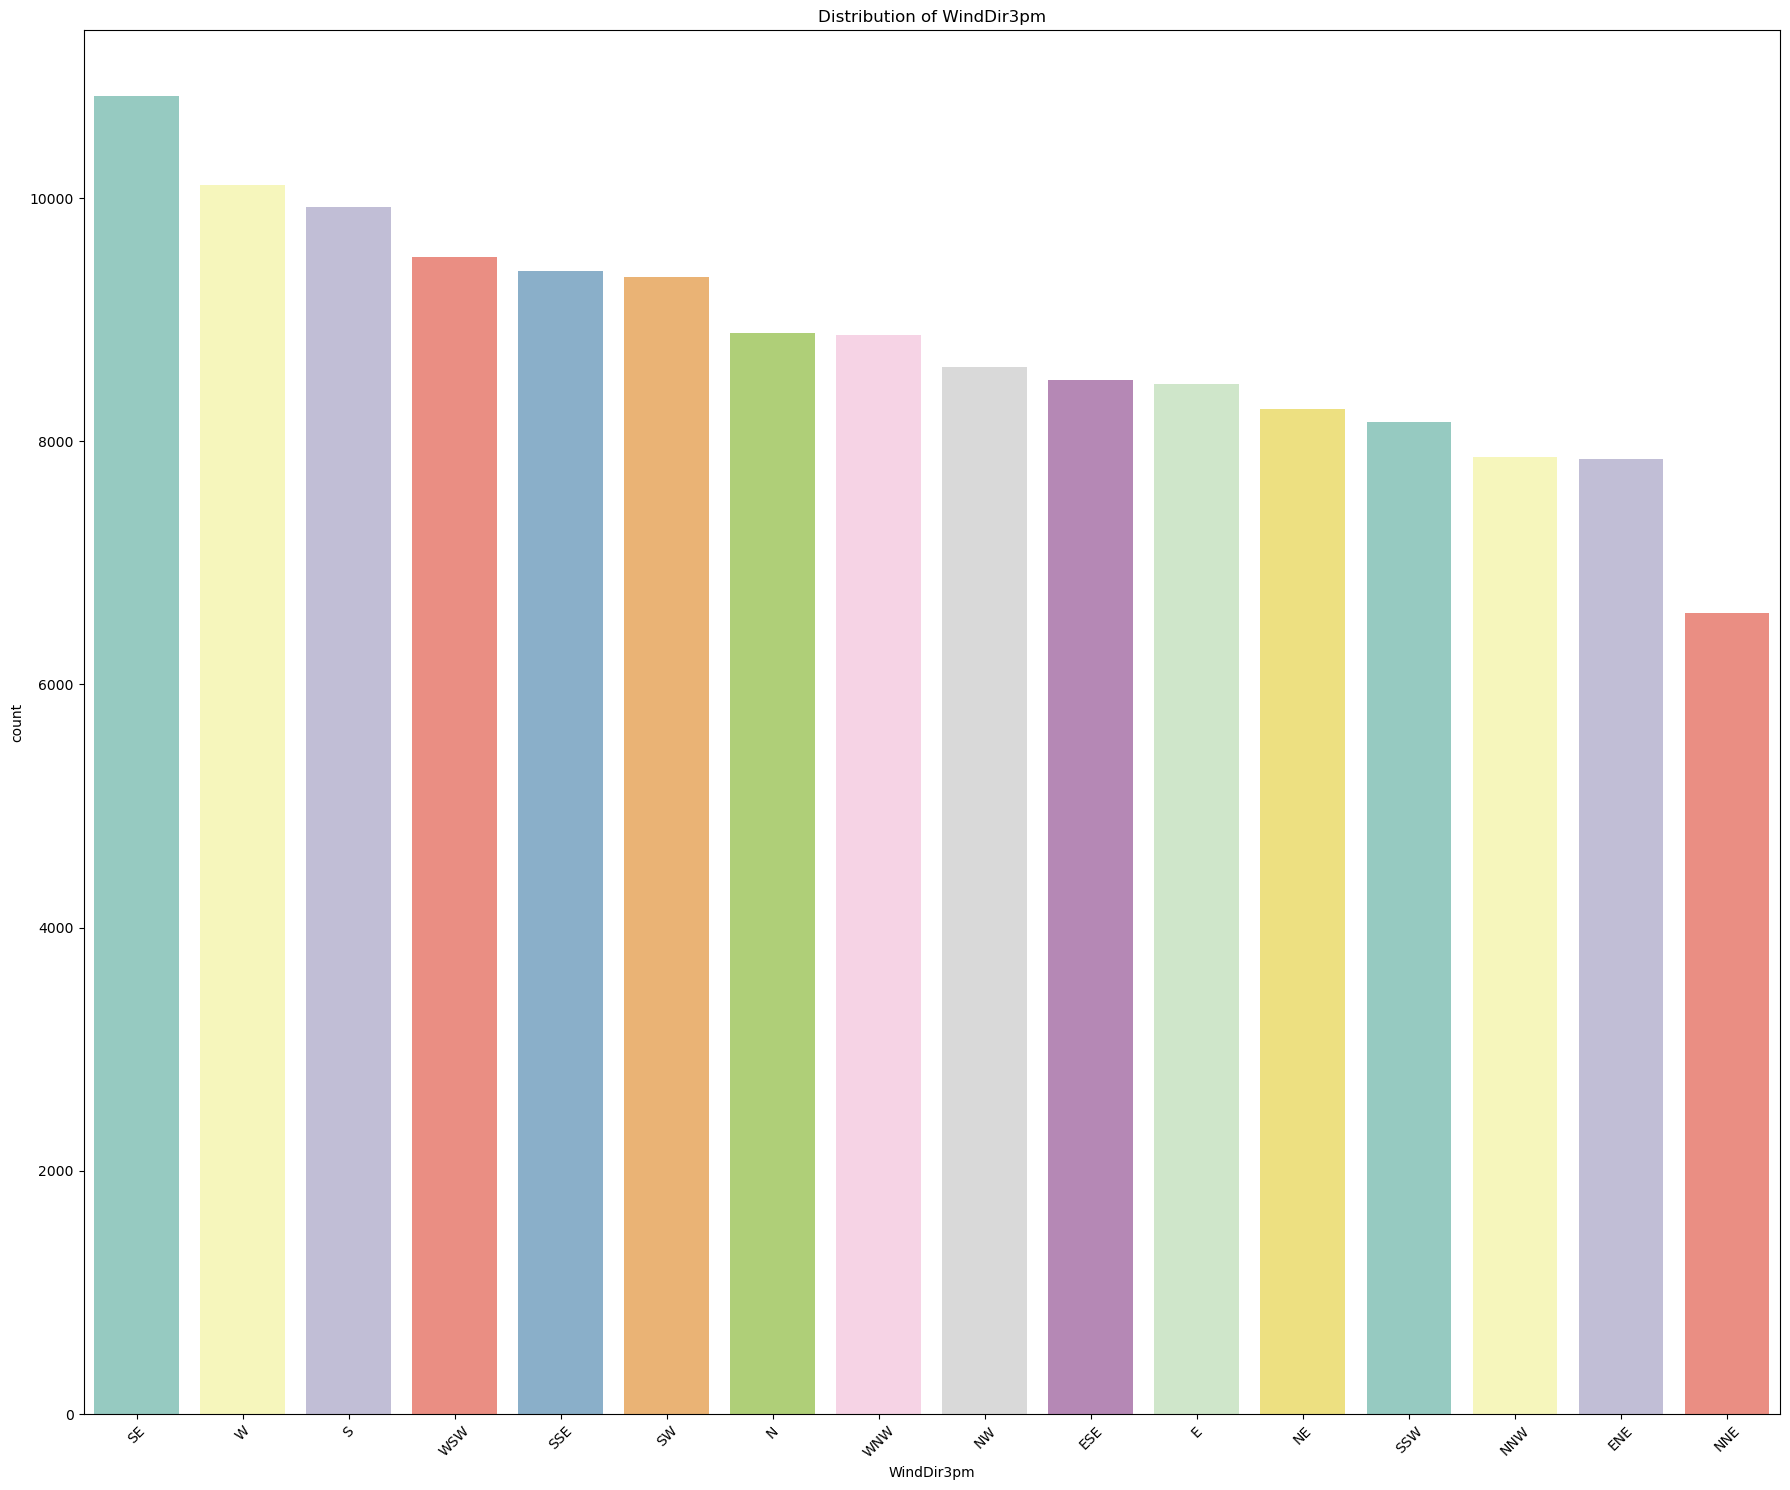

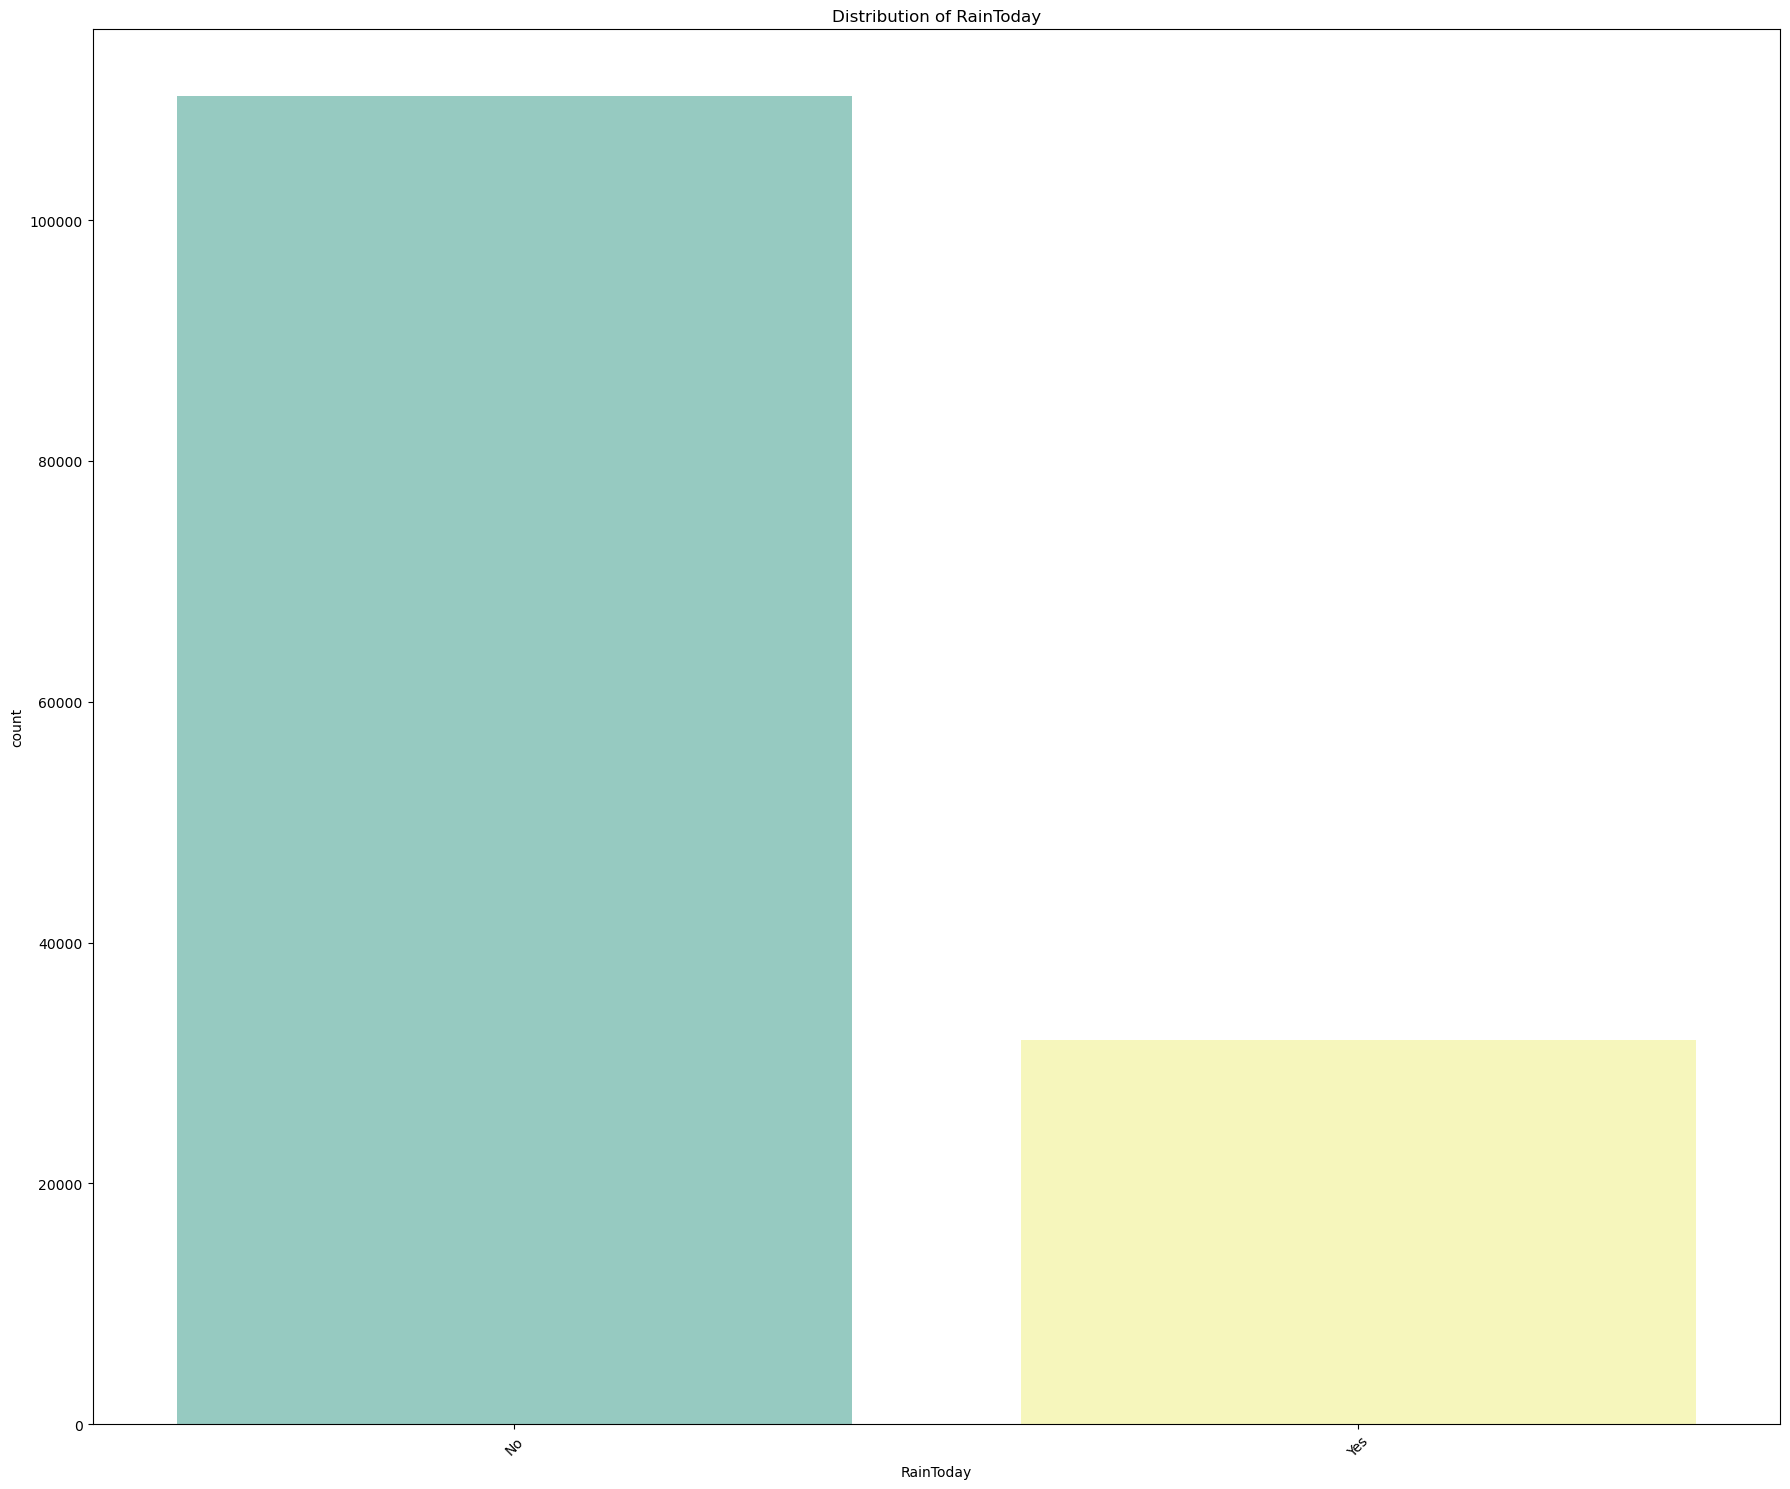

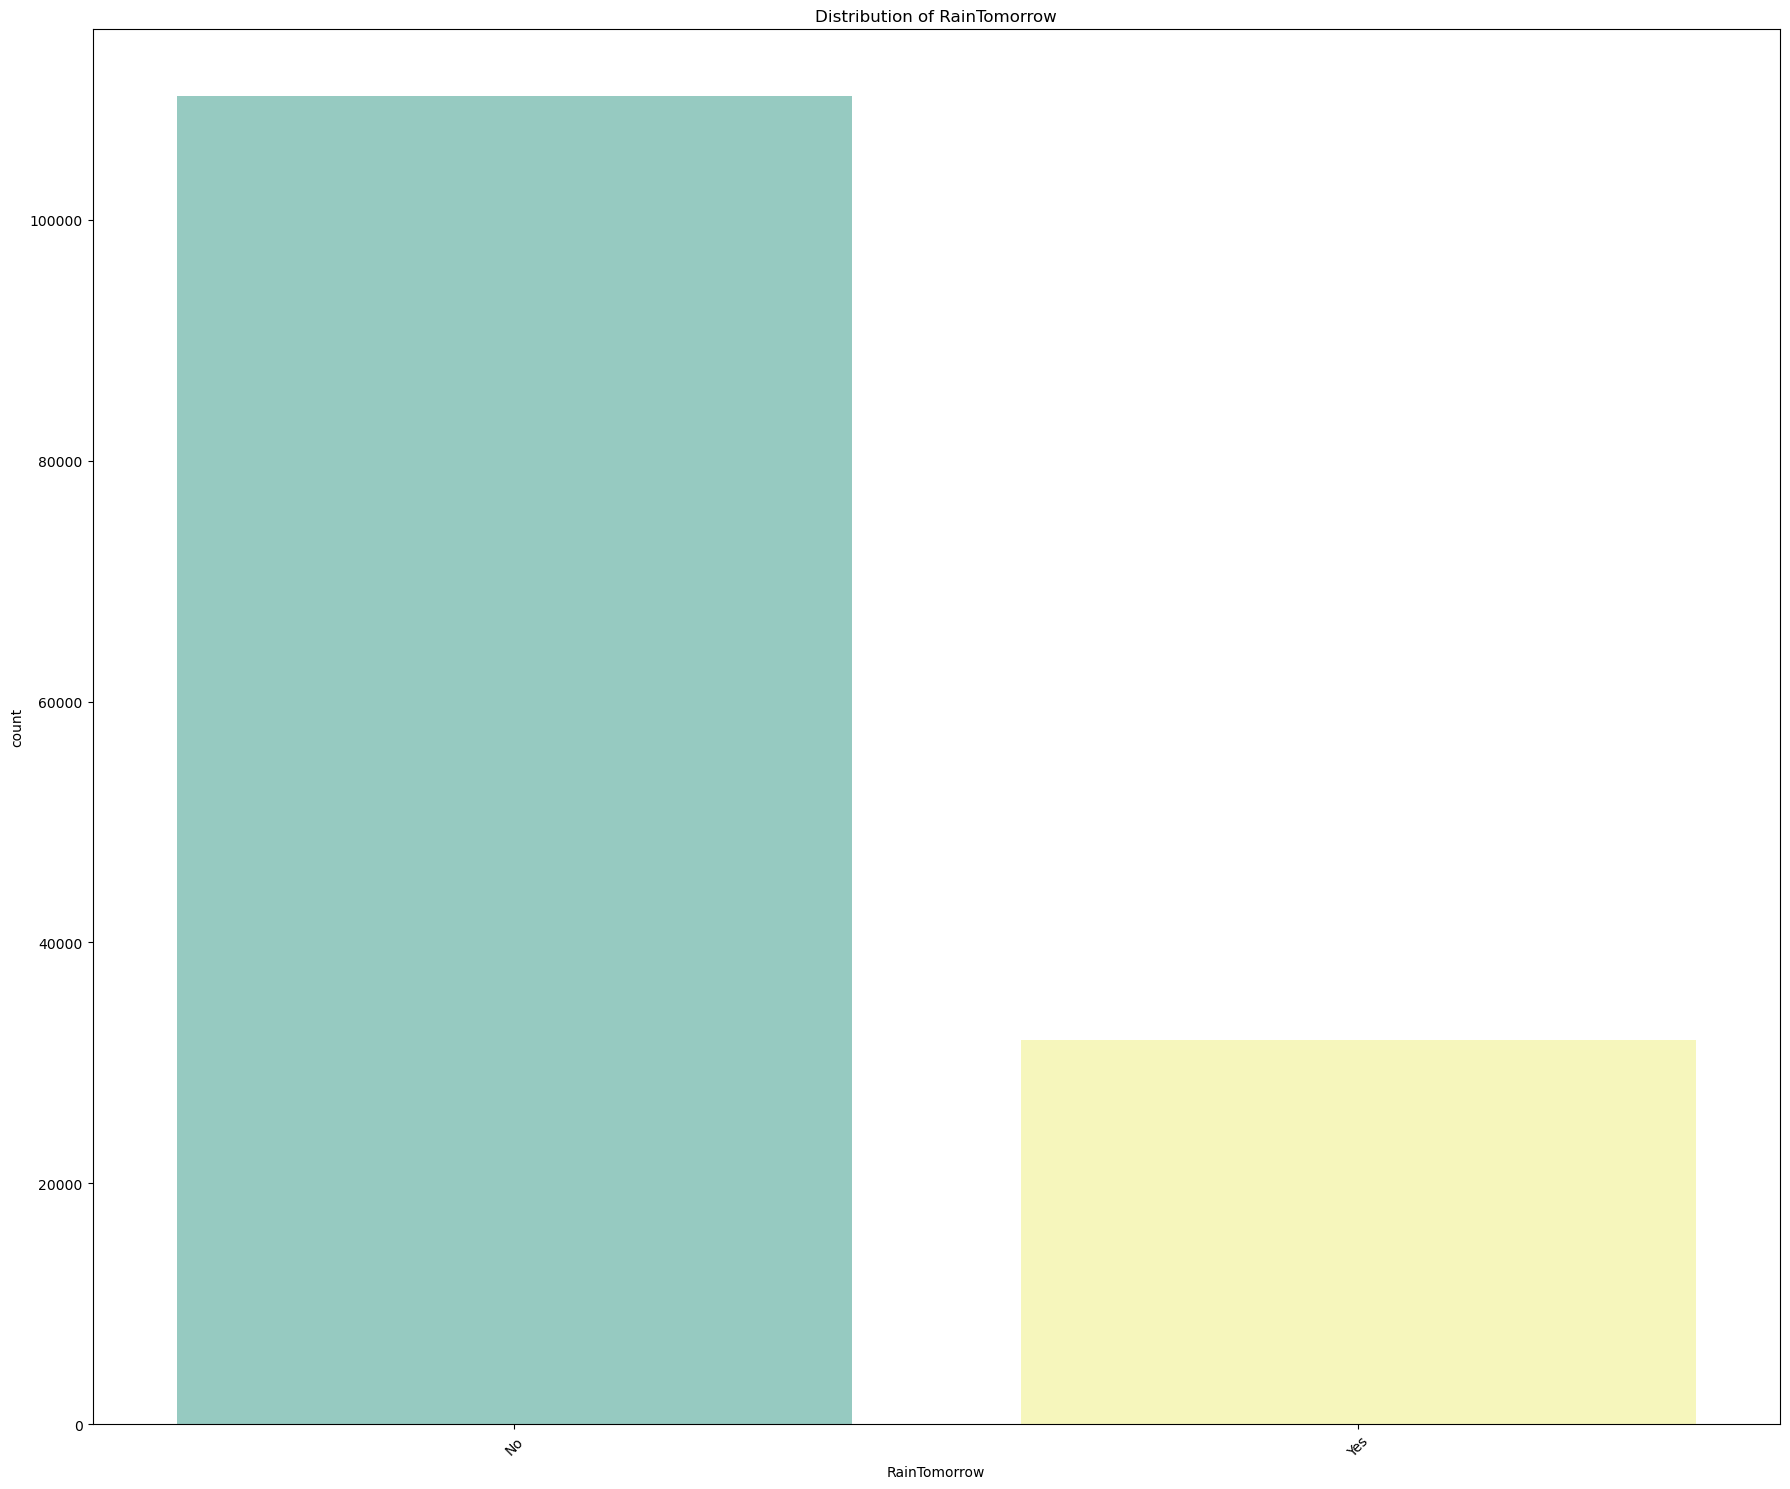

In [11]:
# Detect categorical features
categorical_cols = df.select_dtypes(include='object').columns

# Plot each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(18, 15))
    sns.countplot(data=df, x=col, palette='Set3', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


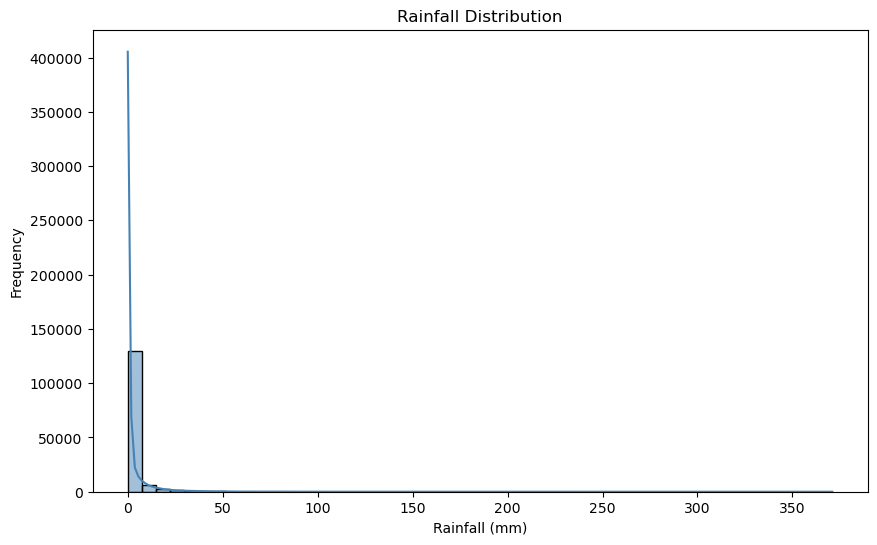

In [12]:
#rainfall histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Rainfall'], bins=50, kde=True, color='steelblue')
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

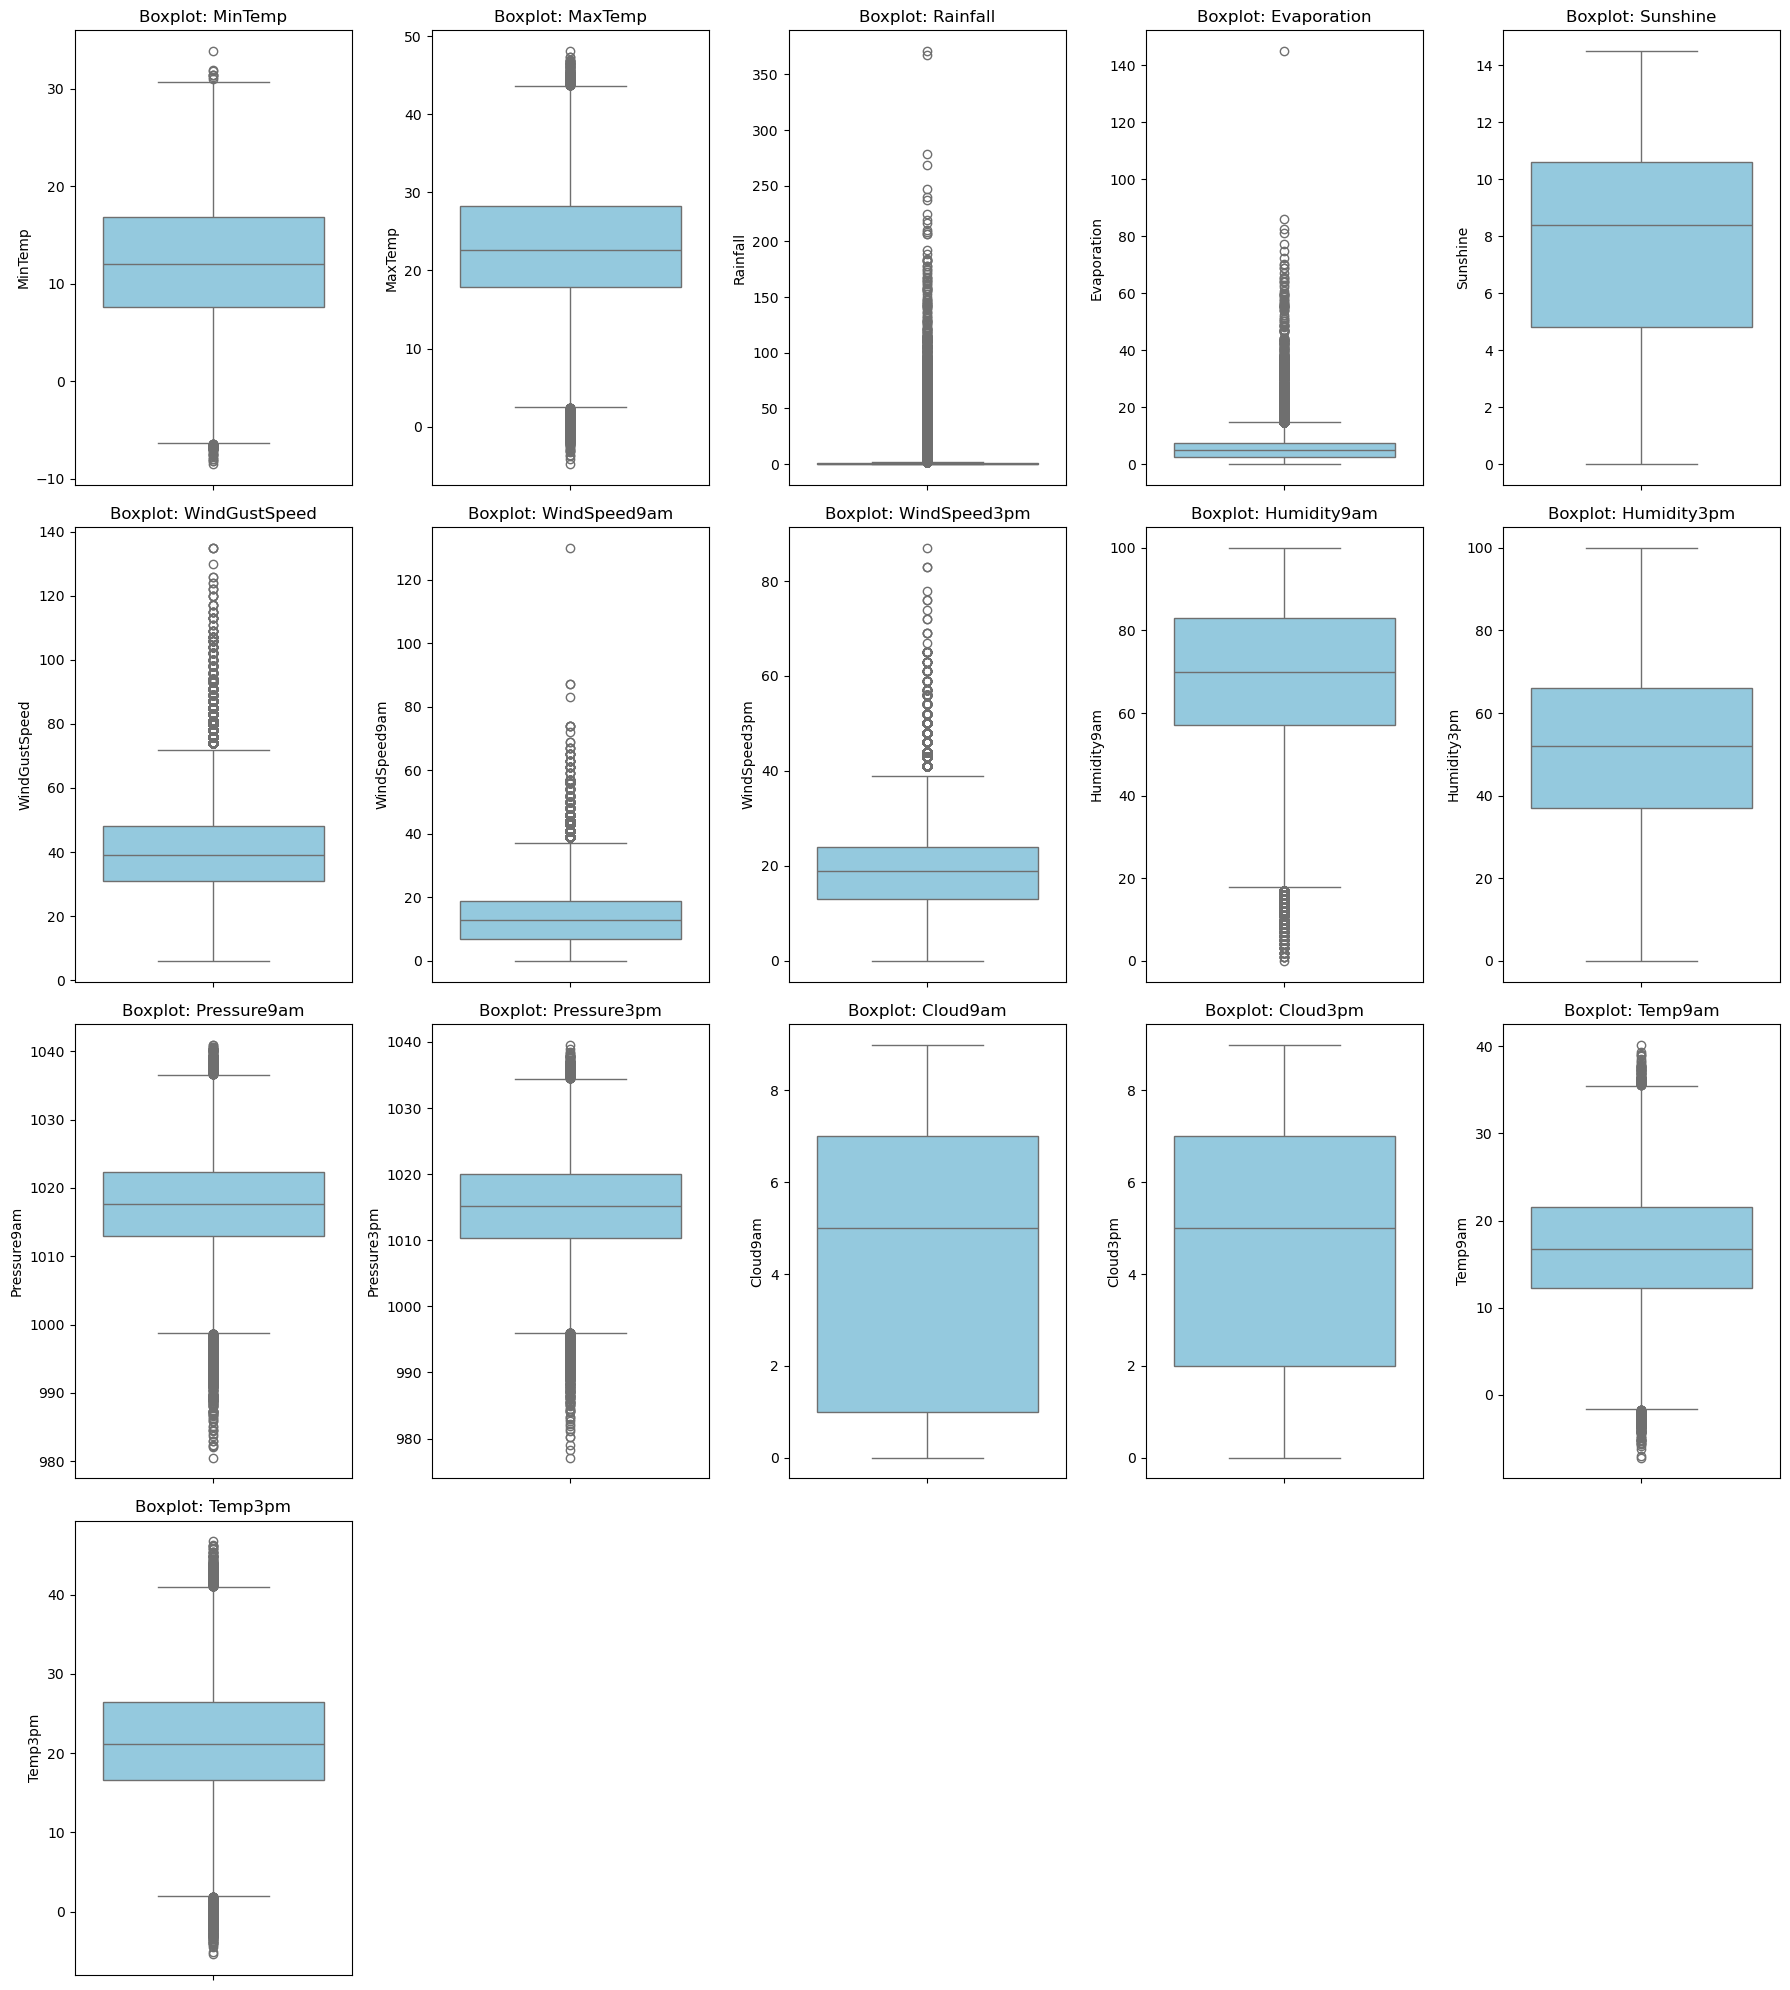

In [13]:
num_features = df.select_dtypes(include=[np.number]).columns
cols = 5
rows = math.ceil(len(num_features) / cols)

plt.figure(figsize=(18, 5 * rows))

for i, feature in enumerate(num_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f'Boxplot: {feature}')
    plt.tight_layout()

plt.show()


In [14]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize a dictionary to store outlier counts
outlier_results = {}

# IQR outlier detection for each numeric column
for col in numeric_cols:
    col_data = df[col].dropna()
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
    outlier_count = len(outliers)
    total_count = len(col_data)
    percent_outliers = 100 * outlier_count / total_count
    outlier_results[col] = [outlier_count, round(percent_outliers, 2)]

# Convert the results to a DataFrame and display
outlier_df = pd.DataFrame(outlier_results, index=['num_outliers', 'percent_outliers']).T
outlier_df = outlier_df.sort_values(by='percent_outliers', ascending=False)

print("\nOutliers detected (using IQR method):")
print(outlier_df)


Outliers detected (using IQR method):
               num_outliers  percent_outliers
Rainfall            25578.0             17.99
Evaporation          1995.0              2.41
WindGustSpeed        3092.0              2.29
WindSpeed3pm         2523.0              1.77
WindSpeed9am         1817.0              1.26
Humidity9am          1425.0              1.00
Pressure9am          1191.0              0.91
Pressure3pm           919.0              0.70
Temp3pm               764.0              0.54
MaxTemp               489.0              0.34
Temp9am               262.0              0.18
MinTemp                54.0              0.04
Sunshine                0.0              0.00
Humidity3pm             0.0              0.00
Cloud9am                0.0              0.00
Cloud3pm                0.0              0.00


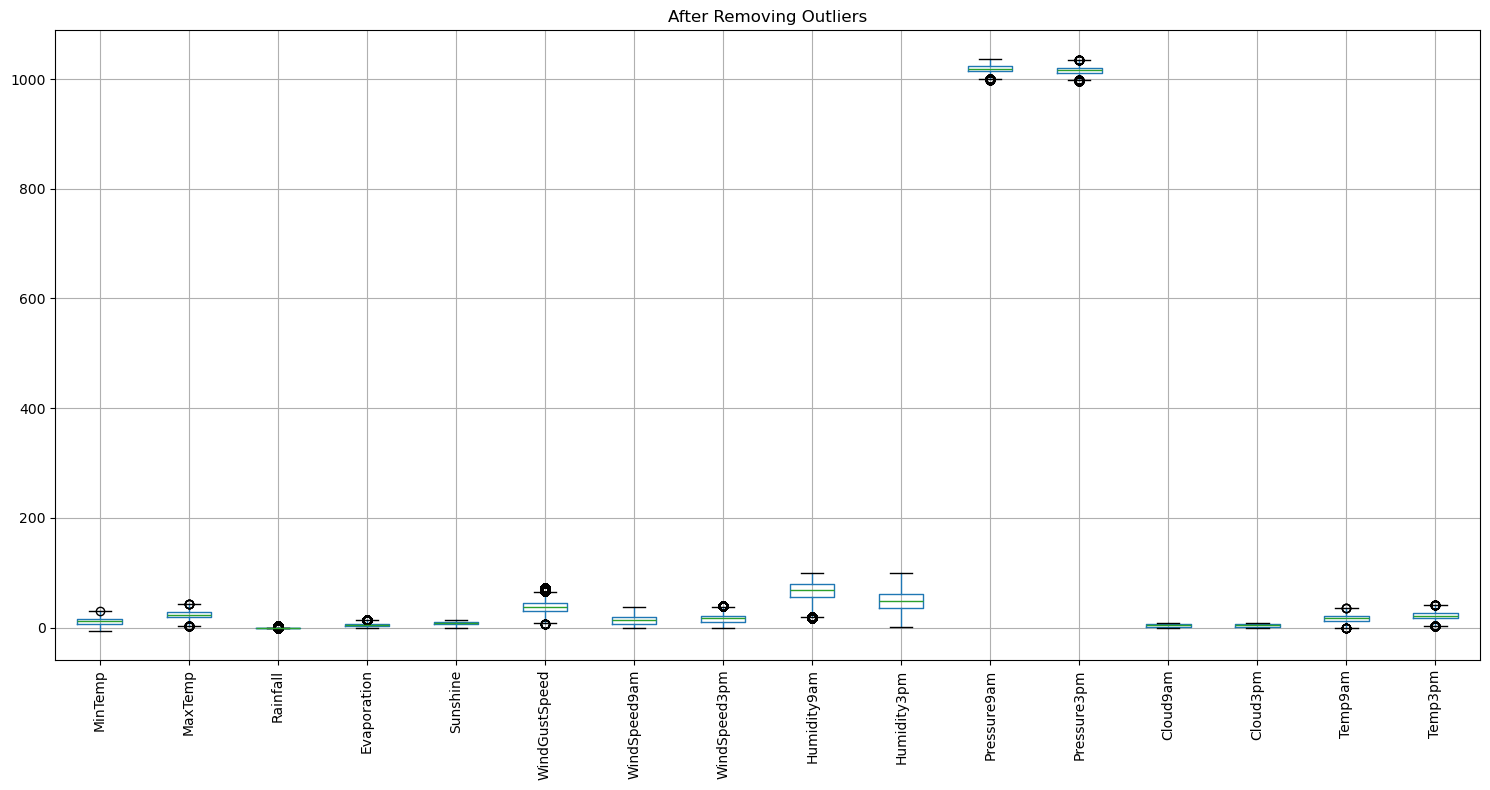

In [15]:
# Define bounds for all numeric columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a mask for non-outlier rows (True means the row is valid)
non_outlier_mask = ~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)

# Apply the mask to get the cleaned DataFrame
df_cleaned = df[non_outlier_mask]

# Visualize after removing outliers
plt.figure(figsize=(15, 8))
df_cleaned[numeric_cols].boxplot()
plt.title('After Removing Outliers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

df = df_cleaned

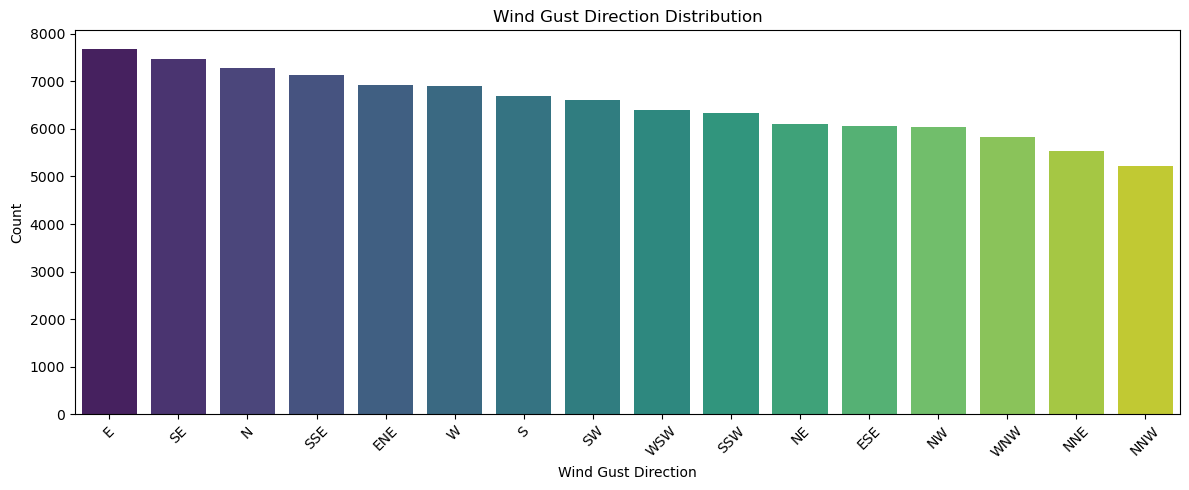

In [16]:
#wind direction distribution
if 'WindGustDir' in df.columns:
    plt.figure(figsize=(12, 5))
    sns.countplot(x='WindGustDir', data=df, palette='viridis', order=df['WindGustDir'].value_counts().index)
    plt.title('Wind Gust Direction Distribution')
    plt.xlabel('Wind Gust Direction')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [17]:
#RainTomorrow across months
if 'Month' in df.columns and 'RainTomorrow' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='Month', hue='RainTomorrow', palette='Set2')
    plt.title('Monthly RainTomorrow Distribution')
    plt.show()

#Season vs RainTomorrow
if 'Season' in df.columns:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x='Season', hue='RainTomorrow', palette='Paired')
    plt.title("RainTomorrow by Season")
    plt.tight_layout()
    plt.show()


In [18]:
# Data Preprocessing
# Handling dates
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Season'] = pd.cut(df['Month'],
                     bins=[0,3,6,9,12],
                     labels=['Summer','Autumn','Winter','Spring'])


In [19]:
print("Performing advanced feature engineering...")

# Basic meteorological features
if 'Humidity9am' in df.columns and 'Humidity3pm' in df.columns:
    df['HumidityDiff'] = df['Humidity9am'] - df['Humidity3pm']
    df['HumidityMean'] = (df['Humidity9am'] + df['Humidity3pm']) / 2

if 'Temp9am' in df.columns and 'Temp3pm' in df.columns:
    df['TempDiff'] = df['Temp3pm'] - df['Temp9am']
    df['TempRate'] = df['TempDiff'] / 6 
    df['TempMean'] = (df['Temp9am'] + df['Temp3pm']) / 2

if 'Pressure9am' in df.columns and 'Pressure3pm' in df.columns:
    df['PressureDiff'] = df['Pressure9am'] - df['Pressure3pm']
    df['PressureMean'] = (df['Pressure9am'] + df['Pressure3pm']) / 2

# Advanced meteorological interactions
if 'Rainfall' in df.columns:
    df['RainfallSquared'] = df['Rainfall'] ** 2
    df['RainfallBinary'] = (df['Rainfall'] > 1).astype(int)

# Wind features
if all(col in df.columns for col in ['WindSpeed9am', 'WindSpeed3pm']):
    df['WindSpeedChange'] = df['WindSpeed3pm'] - df['WindSpeed9am']
    df['WindSpeedMean'] = (df['WindSpeed9am'] + df['WindSpeed3pm']) / 2

# Pressure-humidity interactions (meteorologically significant)
if all(col in df.columns for col in ['Pressure9am', 'Humidity9am']):
    df['Pressure_Humidity_9am'] = df['Pressure9am'] * df['Humidity9am'] / 100
    
if all(col in df.columns for col in ['Pressure3pm', 'Humidity3pm']):
    df['Pressure_Humidity_3pm'] = df['Pressure3pm'] * df['Humidity3pm'] / 100

# Temperature-humidity interactions (dew point proxy)
if all(col in df.columns for col in ['Temp9am', 'Humidity9am']):
    df['Temp_Humidity_9am'] = df['Temp9am'] * df['Humidity9am'] / 100
    
if all(col in df.columns for col in ['Temp3pm', 'Humidity3pm']):
    df['Temp_Humidity_3pm'] = df['Temp3pm'] * df['Humidity3pm'] / 100

# Create climate zones based on location rainfall patterns
if 'Location' in df.columns:
    # Calculate average rainfall by location 
    location_avg_rain = df.groupby('Location')['Rainfall'].mean().reset_index()
    location_rain_dict = dict(zip(location_avg_rain['Location'], location_avg_rain['Rainfall']))
    
    # Map to create climate zone feature
    df['AvgLocationRainfall'] = df['Location'].map(location_rain_dict)
    
    # Create climate zones
    df['ClimateZone'] = pd.cut(
        df['AvgLocationRainfall'],
        bins=[0, 1, 2, 5, 10, float('inf')],
        labels=['Very Dry', 'Dry', 'Moderate', 'Wet', 'Very Wet']
    )



2. Performing advanced feature engineering...


In [20]:
# Drop Date column
df = df.drop('Date', axis=1)

In [21]:
# Encode categorical target variables
print("\nEncoding categorical target variables...")
if 'RainTomorrow' in df.columns:
    df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
if 'RainToday' in df.columns:
    df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})


Encoding categorical target variables...


In [22]:
# Separate features and target
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [41]:
# Handle missing values in target
nan_mask = y.isnull()
print(f"\nRemoving {nan_mask.sum()} rows with missing target values")
X = X[~nan_mask]
y = y[~nan_mask]


Removing 0 rows with missing target values


In [24]:
# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumeric features ({len(numeric_features)}): {numeric_features[:5]}...")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")


Numeric features (32): ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']...
Categorical features (4): ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [25]:
# Use stratified sampling to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (87570, 43)
Test set: (21893, 43)


In [26]:
#Creating preprocessing pipeline

# Numeric transformer with standard imputation methods
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5, weights='distance')), 
    ('scaler', StandardScaler())
])

# Categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)



5. Creating simplified preprocessing pipeline...


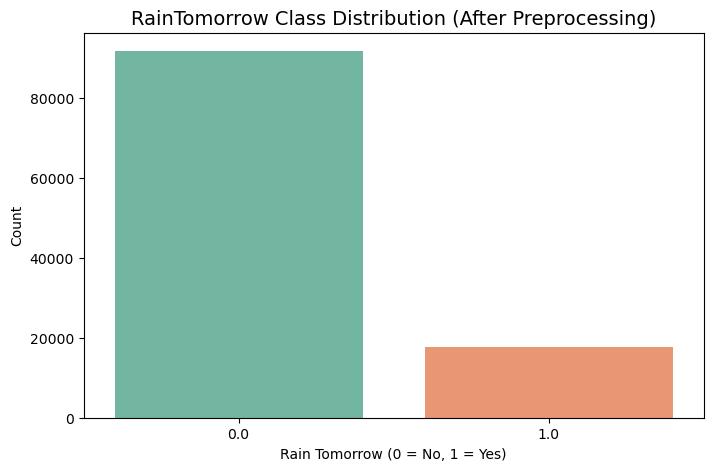

In [28]:
# Class distribution after cleaning
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette='Set2')
plt.title('RainTomorrow Class Distribution (After Preprocessing)', fontsize=14)
plt.xlabel('Rain Tomorrow (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [29]:
# Initial preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names
onehot_feature_names = []
if categorical_features:
    onehot_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = np.append(numeric_features, onehot_feature_names)


In [30]:
print("\nPerforming feature selection...")
feature_selector = SelectFromModel(
    DecisionTreeClassifier(max_depth=10, random_state=42), 
    threshold='mean'
)
feature_selector.fit(X_train_processed, y_train)

# Apply feature selection
X_train_selected = feature_selector.transform(X_train_processed)
X_test_selected = feature_selector.transform(X_test_processed)

# Get selected feature mask and names
feature_mask = feature_selector.get_support()
selected_features = all_feature_names[feature_mask]
print(f"Selected {X_train_selected.shape[1]} features out of {X_train_processed.shape[1]}")
print(f"Top selected features: {selected_features[:10]}...")


Performing feature selection...
Selected 17 features out of 129
Top selected features: ['MinTemp' 'Sunshine' 'WindGustSpeed' 'WindSpeed3pm' 'Humidity3pm'
 'Pressure3pm' 'Cloud3pm' 'Temp3pm' 'HumidityDiff' 'HumidityMean']...


In [31]:
print("Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts(normalize=True) * 100)

# Use SMOTE with adjusted minority class
smote = SMOTE(sampling_strategy=0.35, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_selected, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts(normalize=True) * 100)

Class distribution before SMOTE:
RainTomorrow
0.0    83.891744
1.0    16.108256
Name: proportion, dtype: float64

Class distribution after SMOTE:
RainTomorrow
0.0    74.074373
1.0    25.925627
Name: proportion, dtype: float64


In [32]:
print("\n8. Training optimized decision tree...")

# Define targeted hyperparameter space
param_dist = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [5, 6, 8, 10, 12, 15],
    'min_samples_split': [10, 15, 20, 25, 30],
    'min_samples_leaf': [5, 8, 10, 15],
    'class_weight': [{0: 1, 1: 1.5}, {0: 1, 1: 2}, {0: 1, 1: 3}, 'balanced'],
    'splitter': ['best', 'random']
}

# Use stratified cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize decision tree
dt_model = DecisionTreeClassifier(random_state=42)

# RandomizedSearchCV with balanced_accuracy scoring
random_search = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_dist,
    n_iter=60,
    cv=cv_strategy,
    scoring='balanced_accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Train the model
print("\nPerforming hyperparameter search...")
random_search.fit(X_resampled, y_resampled)

# Get best model
best_dt_model = random_search.best_estimator_
print("\nBest hyperparameters:")
for param, value in random_search.best_params_.items():
    print(f"{param}: {value}")



8. Training optimized decision tree...

Performing hyperparameter search...
Fitting 5 folds for each of 60 candidates, totalling 300 fits

Best hyperparameters:
splitter: best
min_samples_split: 10
min_samples_leaf: 10
max_depth: 12
criterion: gini
class_weight: balanced


In [33]:
print("\n9. Creating ensemble of decision trees...")

# Create individual decision trees with different parameters
dt1 = DecisionTreeClassifier(
    max_depth=random_search.best_params_['max_depth'],
    min_samples_split=random_search.best_params_['min_samples_split'],
    class_weight=random_search.best_params_['class_weight'],
    criterion=random_search.best_params_['criterion'],
    random_state=42
)

dt2 = DecisionTreeClassifier(
    max_depth=random_search.best_params_['max_depth'] - 2 if random_search.best_params_['max_depth'] > 2 else 2,
    min_samples_leaf=random_search.best_params_['min_samples_leaf'] + 5,
    criterion='entropy' if random_search.best_params_['criterion'] == 'gini' else 'gini',
    random_state=43
)

dt3 = DecisionTreeClassifier(
    max_depth=random_search.best_params_['max_depth'] + 2,
    min_samples_split=max(2, random_search.best_params_['min_samples_split'] - 5),
    class_weight='balanced',
    random_state=44
)

# Create voting ensemble
ensemble_model = VotingClassifier(
    estimators=[
        ('dt1', dt1),
        ('dt2', dt2),
        ('dt3', dt3),
        ('best_dt', best_dt_model)
    ],
    voting='soft'
)

# Train the ensemble
print("\nTraining ensemble model...")
ensemble_model.fit(X_resampled, y_resampled)



9. Creating ensemble of decision trees...

Training ensemble model...


VotingClassifier(estimators=[('dt1',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=12,
                                                     min_samples_split=10,
                                                     random_state=42)),
                             ('dt2',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     min_samples_leaf=15,
                                                     random_state=43)),
                             ('dt3',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=14,
                                                     min_samples_split=5,
                                                     random_state=44)),
                             ('best_dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=12,
                                                     min_samples_leaf=10,
                                                     min_samples_split=10,
                                                     random_state=42))],
                 voting='soft')

In [34]:
print("\n10. Optimizing classification threshold...")

# Generate predictions from both models
y_pred_best_dt = best_dt_model.predict(X_test_selected)
y_prob_best_dt = best_dt_model.predict_proba(X_test_selected)[:, 1]

y_pred_ensemble = ensemble_model.predict(X_test_selected)
y_prob_ensemble = ensemble_model.predict_proba(X_test_selected)[:, 1]

# Find optimal threshold for ensemble model
thresholds = np.arange(0.3, 0.7, 0.02)
accuracy_scores = []
balanced_accuracy_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_prob_ensemble >= thresh).astype(int)
    accuracy_scores.append(accuracy_score(y_test, y_pred_thresh))
    balanced_accuracy_scores.append(balanced_accuracy_score(y_test, y_pred_thresh))

# Find optimal threshold
optimal_idx = np.argmax(accuracy_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"\nOptimal threshold: {optimal_threshold:.2f} (accuracy: {accuracy_scores[optimal_idx]:.4f})")

# Apply optimal threshold
y_pred_optimal = (y_prob_ensemble >= optimal_threshold).astype(int)



10. Optimizing classification threshold...

Optimal threshold: 0.68 (accuracy: 0.8494)


In [35]:
print("\n11. Evaluating model performance...")

# Function to display model metrics
def evaluate_model(y_true, y_pred, y_prob=None, model_name="Model"):
    acc = accuracy_score(y_true, y_pred)
    bal_acc = balanced_accuracy_score(y_true, y_pred)
    conf_mat = confusion_matrix(y_true, y_pred)
    
    print(f"\n--- {model_name} Performance ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    print("\nConfusion Matrix:")
    print(conf_mat)
    
    # If probabilities are provided, calculate ROC AUC
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        roc_auc = auc(fpr, tpr)
        print(f"ROC AUC: {roc_auc:.4f}")
    
    return acc, bal_acc, conf_mat

# Evaluate best decision tree model
dt_acc, dt_bal_acc, dt_conf_mat = evaluate_model(
    y_test, y_pred_best_dt, y_prob_best_dt, "Best Decision Tree"
)

# Evaluate ensemble model with default threshold
ens_acc, ens_bal_acc, ens_conf_mat = evaluate_model(
    y_test, y_pred_ensemble, y_prob_ensemble, "Ensemble Model (Default Threshold)"
)

# Evaluate ensemble model with optimal threshold
opt_acc, opt_bal_acc, opt_conf_mat = evaluate_model(
    y_test, y_pred_optimal, y_prob_ensemble, "Ensemble Model (Optimal Threshold)"
)


11. Evaluating model performance...

--- Best Decision Tree Performance ---
Accuracy: 0.7437
Balanced Accuracy: 0.7264

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83     18366
         1.0       0.35      0.70      0.47      3527

    accuracy                           0.74     21893
   macro avg       0.64      0.73      0.65     21893
weighted avg       0.84      0.74      0.77     21893


Confusion Matrix:
[[13809  4557]
 [ 1055  2472]]
ROC AUC: 0.7903

--- Ensemble Model (Default Threshold) Performance ---
Accuracy: 0.7990
Balanced Accuracy: 0.7277

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87     18366
         1.0       0.42      0.62      0.50      3527

    accuracy                           0.80     21893
   macro avg       0.67      0.73      0.69     21893
weighted avg       0.84      0.80      0.81     21893


Confusion Ma

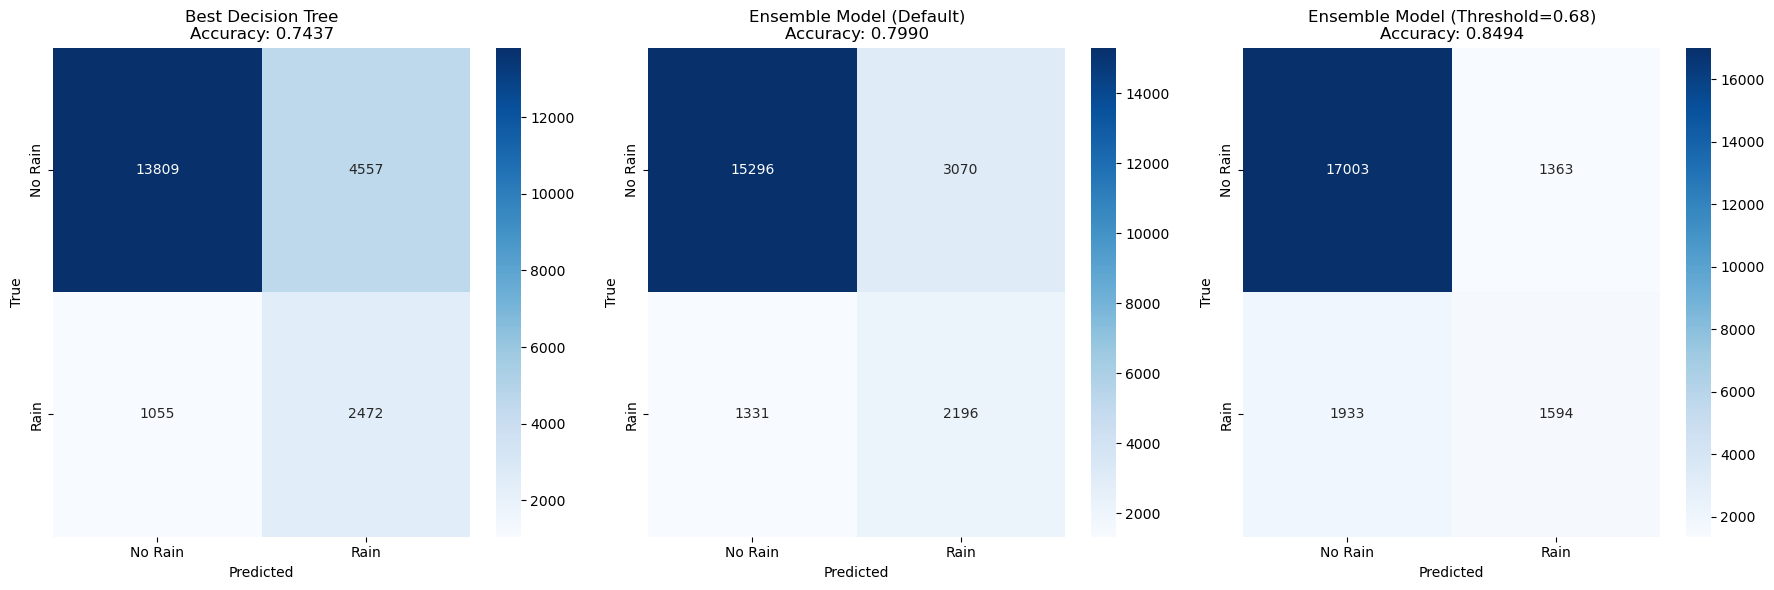

In [36]:
# 1. Confusion Matrices Comparison
plt.figure(figsize=(18, 6))

# Calculate confusion matrices
dt_conf_mat = confusion_matrix(y_test, y_pred_best_dt)
ens_conf_mat = confusion_matrix(y_test, y_pred_ensemble)
opt_conf_mat = confusion_matrix(y_test, y_pred_optimal)

# Calculate accuracies
from sklearn.metrics import accuracy_score, balanced_accuracy_score
dt_acc = accuracy_score(y_test, y_pred_best_dt)
ens_acc = accuracy_score(y_test, y_pred_ensemble)
opt_acc = accuracy_score(y_test, y_pred_optimal)

plt.subplot(1, 3, 1)
sns.heatmap(dt_conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.title(f'Best Decision Tree\nAccuracy: {dt_acc:.4f}')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 3, 2)
sns.heatmap(ens_conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.title(f'Ensemble Model (Default)\nAccuracy: {ens_acc:.4f}')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 3, 3)
sns.heatmap(opt_conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.title(f'Ensemble Model (Threshold={optimal_threshold:.2f})\nAccuracy: {opt_acc:.4f}')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

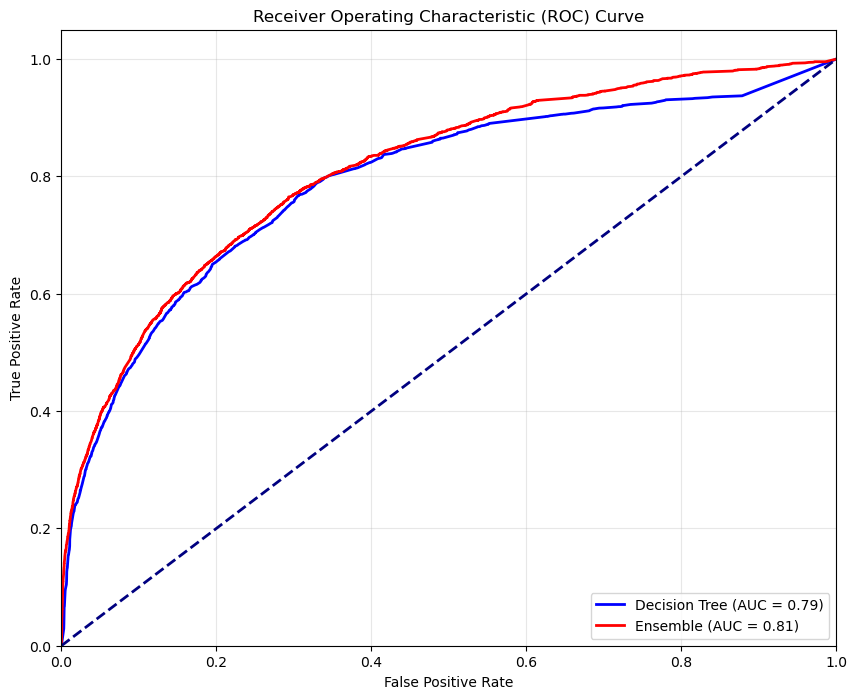

In [37]:
# 2. ROC Curves
plt.figure(figsize=(10, 8))

# ROC for best decision tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_best_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, 
         label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# ROC for ensemble
fpr_ens, tpr_ens, _ = roc_curve(y_test, y_prob_ensemble)
roc_auc_ens = auc(fpr_ens, tpr_ens)
plt.plot(fpr_ens, tpr_ens, color='red', lw=2, 
         label=f'Ensemble (AUC = {roc_auc_ens:.2f})')

# Reference line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

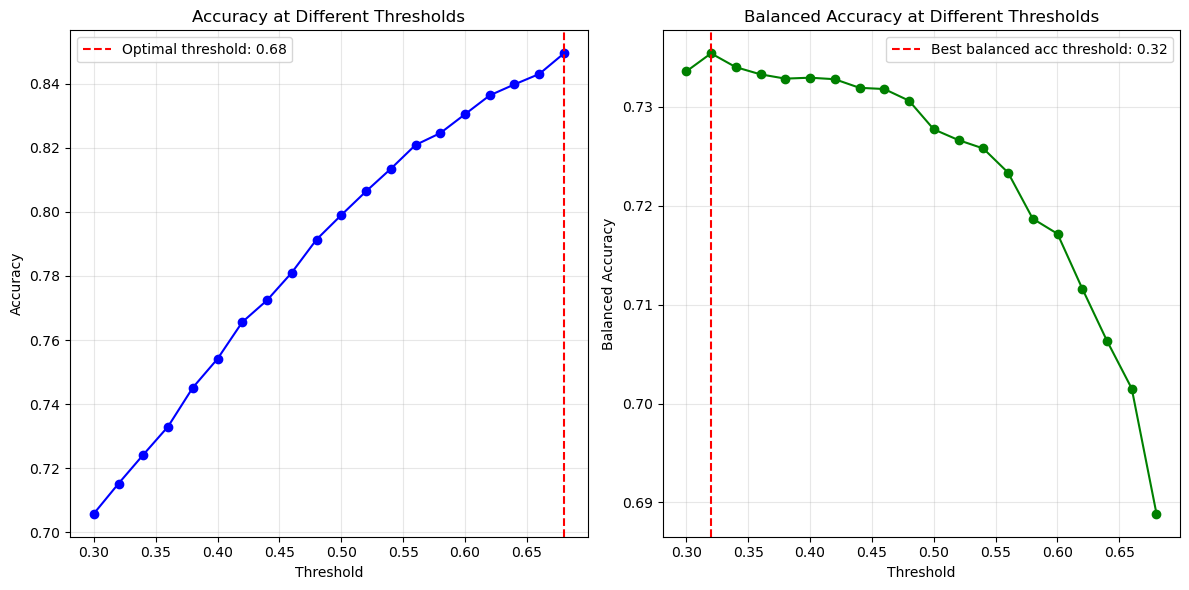

In [38]:
# 3. Threshold Optimization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(thresholds, accuracy_scores, marker='o', color='blue', linestyle='-')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', 
           label=f'Optimal threshold: {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy at Different Thresholds')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(thresholds, balanced_accuracy_scores, marker='o', color='green', linestyle='-')
best_bal_acc_idx = np.argmax(balanced_accuracy_scores)
plt.axvline(x=thresholds[best_bal_acc_idx], color='red', linestyle='--',
           label=f'Best balanced acc threshold: {thresholds[best_bal_acc_idx]:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy at Different Thresholds')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

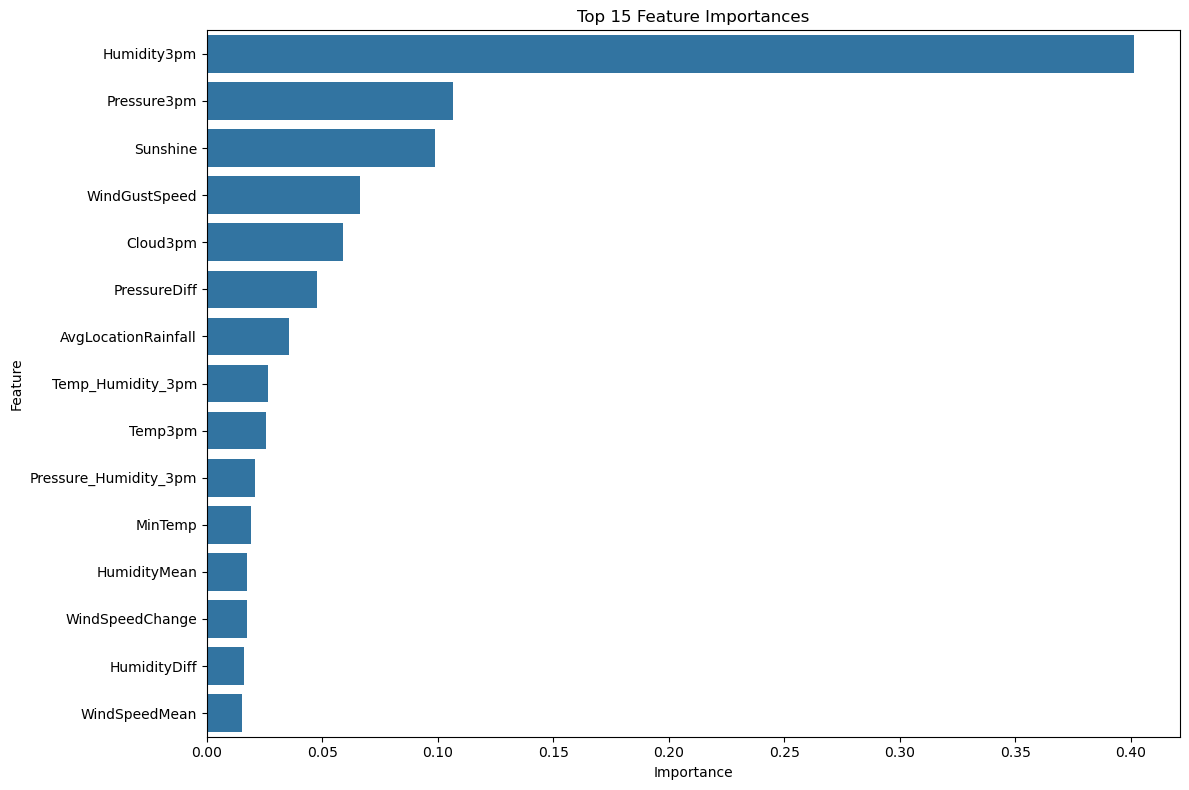


Top 10 most important features:
1. Humidity3pm: 0.4012
2. Pressure3pm: 0.1066
3. Sunshine: 0.0986
4. WindGustSpeed: 0.0663
5. Cloud3pm: 0.0591
6. PressureDiff: 0.0478
7. AvgLocationRainfall: 0.0356
8. Temp_Humidity_3pm: 0.0265
9. Temp3pm: 0.0256
10. Pressure_Humidity_3pm: 0.0210


In [39]:
# 4. Feature Importance
if hasattr(best_dt_model, 'feature_importances_'):
    # Get selected feature importances
    importances = best_dt_model.feature_importances_
    
    # Create DataFrame for visualization
    feature_importance = pd.DataFrame({
        'Feature': selected_features,
        'Importance': importances
    })
    
    # Sort by importance
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    # Plot top 15 features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Top 15 Feature Importances')
    plt.tight_layout()
    plt.show()

    # Print top features
    print("\nTop 10 most important features:")
    for i, (feature, importance) in enumerate(zip(feature_importance['Feature'].head(10), 
                                                feature_importance['Importance'].head(10))):
        print(f"{i+1}. {feature}: {importance:.4f}")

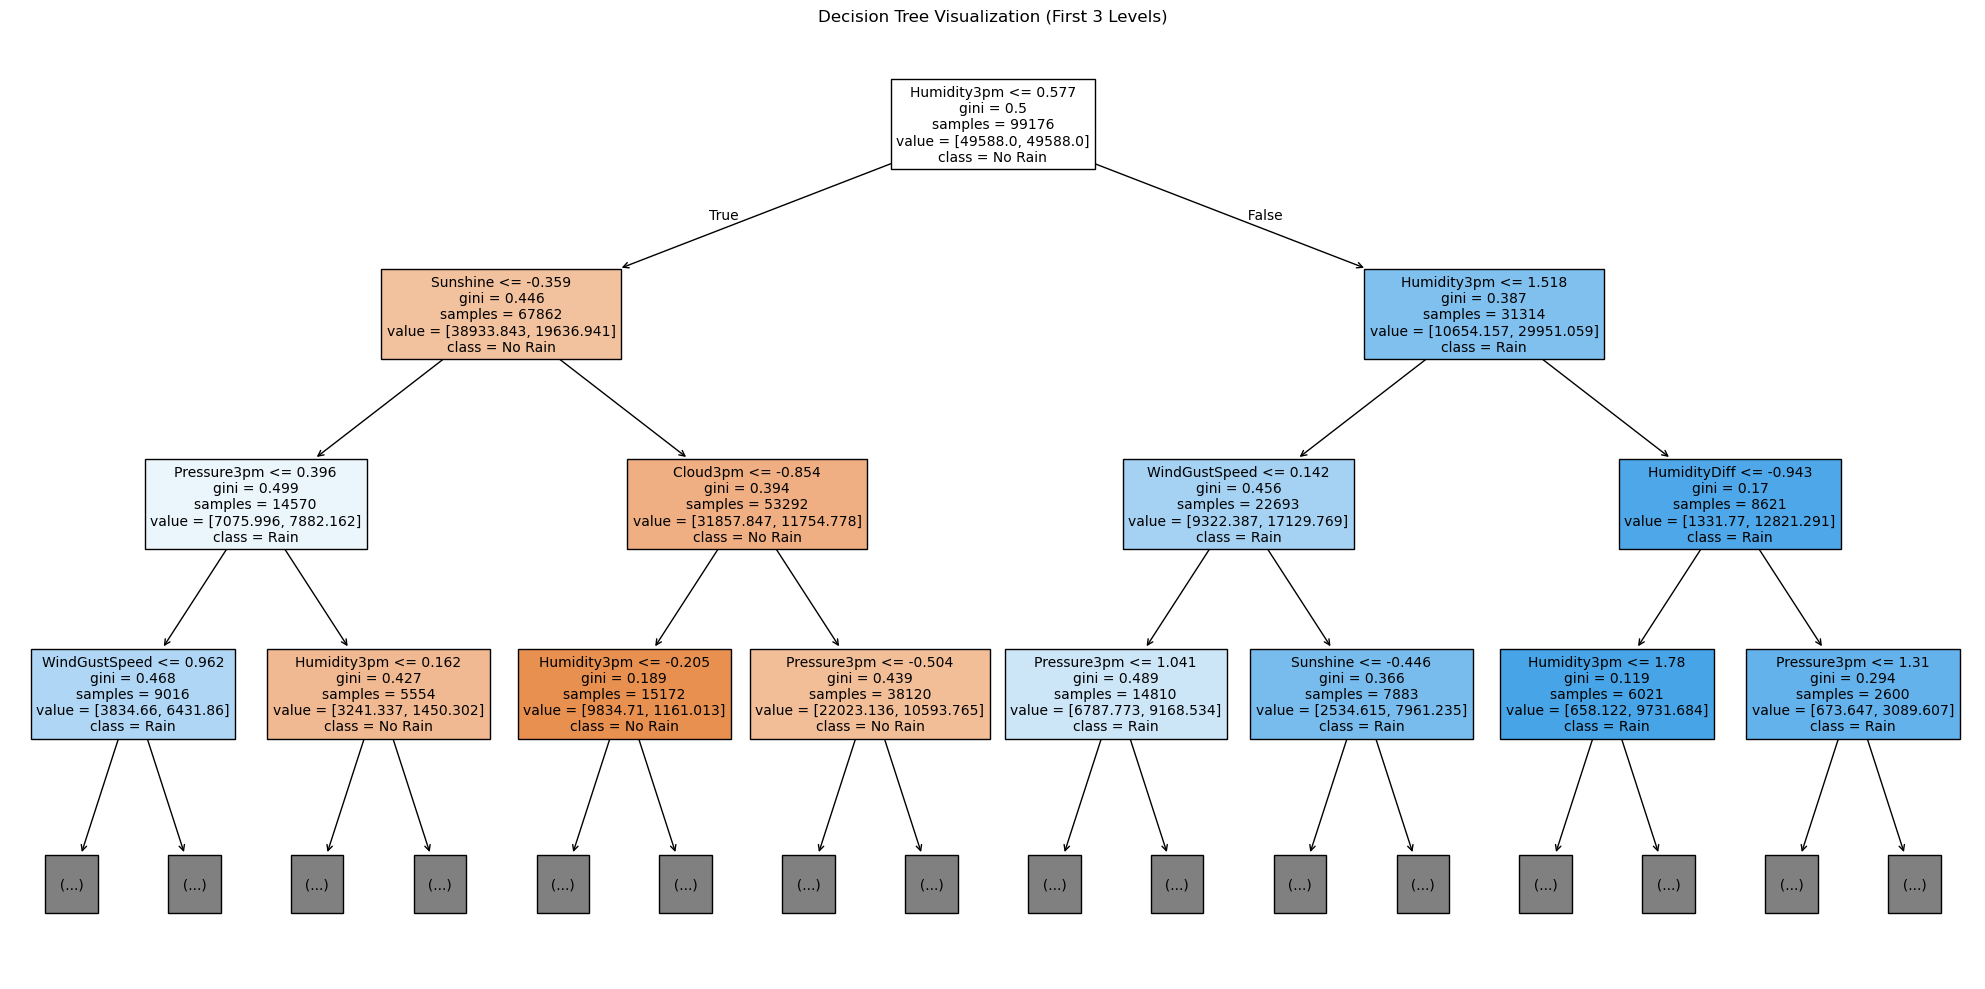

In [40]:
# 5. Decision Tree Visualization
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, filled=True, feature_names=selected_features, 
          class_names=["No Rain", "Rain"], max_depth=3, fontsize=10)
plt.title('Decision Tree Visualization (First 3 Levels)')
plt.tight_layout()
plt.show()